3.1. Explorarea Datelor

1. Analiza tipului de atribute si a plajei de valori a acestora

Afisarea statisticilor pentru atributele numerice continue

a) din setul de date de train

In [1]:
import pandas as pd

df_train = pd.read_csv("air_pollution__train.csv")

numeric_continuous = ["AQI_Value", "CO_Value", "Ozone_Value", "NO2_Value", "PM25_Value", "VOCs", "SO2"]

stats_train = df_train[numeric_continuous].describe(percentiles=[.25, .5, .75]).T
stats_train



,count,mean,std,min,25%,50%,75%,max
AQI_Value,18770.0,71.981726,56.110722,7.000000,39.000000,55.000000,79.000000,500.000000
CO_Value,18770.0,1.378476,1.932713,0.000000,1.000000,1.000000,1.000000,133.000000
Ozone_Value,16900.0,35.372781,28.422401,0.000000,21.000000,31.000000,40.000000,222.000000
NO2_Value,18770.0,43.133438,196.182302,0.000000,0.000000,1.000000,4.000000,1003.063334
PM25_Value,18770.0,68.490996,54.717105,0.000000,35.000000,54.000000,78.000000,500.000000
VOCs,18770.0,185.006426,140.651248,12.415670,103.092298,142.817708,203.969738,1280.988229
SO2,18770.0,4.461538,6.077151,-18.528019,0.734223,4.286593,7.936256,234.692971


b) din setul de date de test

In [2]:
df_test = pd.read_csv("air_pollution_test.csv")

stats_test = df_test[numeric_continuous].describe(percentiles=[.25, .5, .75]).T
stats_test

,count,mean,std,min,25%,50%,75%,max
AQI_Value,4693.0,72.127424,55.838493,6.000000,39.000000,55.000000,80.000000,500.000000
CO_Value,4693.0,1.327935,1.356232,0.000000,1.000000,1.000000,1.000000,21.000000
Ozone_Value,4217.0,34.706189,27.023739,0.000000,21.000000,30.000000,40.000000,207.000000
NO2_Value,4693.0,42.887032,195.686936,0.000000,0.000000,1.000000,4.000000,1003.063334
PM25_Value,4693.0,68.634775,55.118326,2.000000,35.000000,54.000000,80.000000,500.000000
VOCs,4693.0,185.239825,139.841721,15.461284,103.767142,143.413477,205.616347,1279.853139
SO2,4693.0,4.393056,5.431688,-13.338278,0.741786,4.288641,7.814964,41.595139


Afisarea graficelor pentru vizualizarea plajei de valori a atributelor numerice continue

In [3]:
import matplotlib.pyplot as plt

def plot_boxplot(df, columns):
    df[columns].boxplot(figsize=(12, 6))
    plt.title("Plajele de valori ale atricutelor numerice continue")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Boxplot pentru afisarea plajei de valori a atributelor numerice continue pentru setul de train

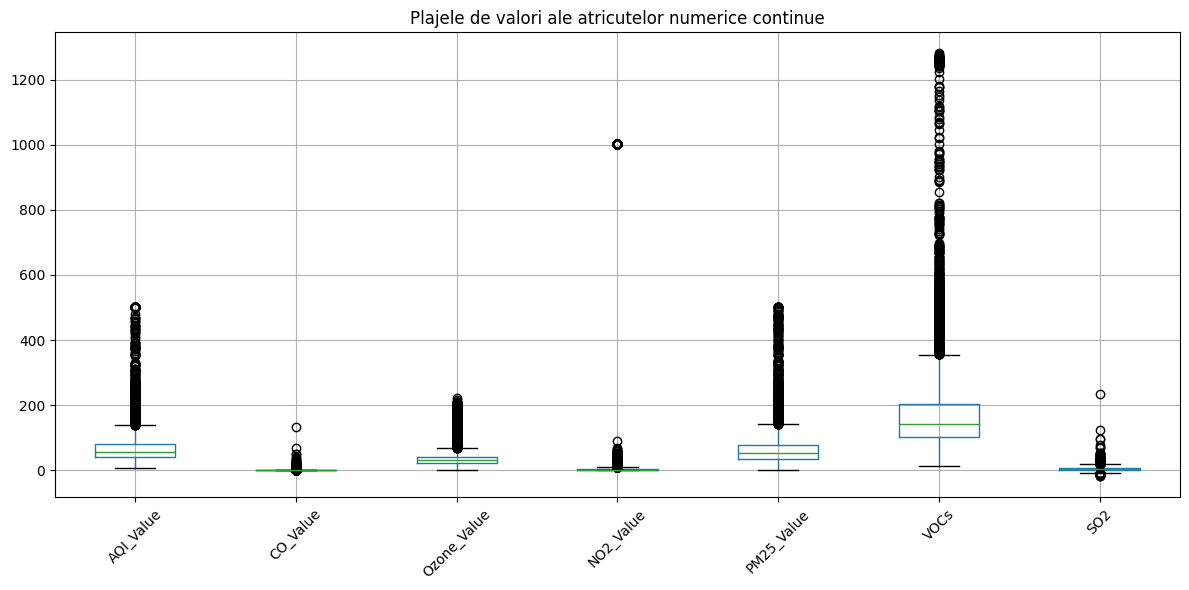

In [4]:
plot_boxplot(df_train, numeric_continuous)

Boxplot pentru afisarea plajei de valori a atributelor numerice continue pentru setul de test

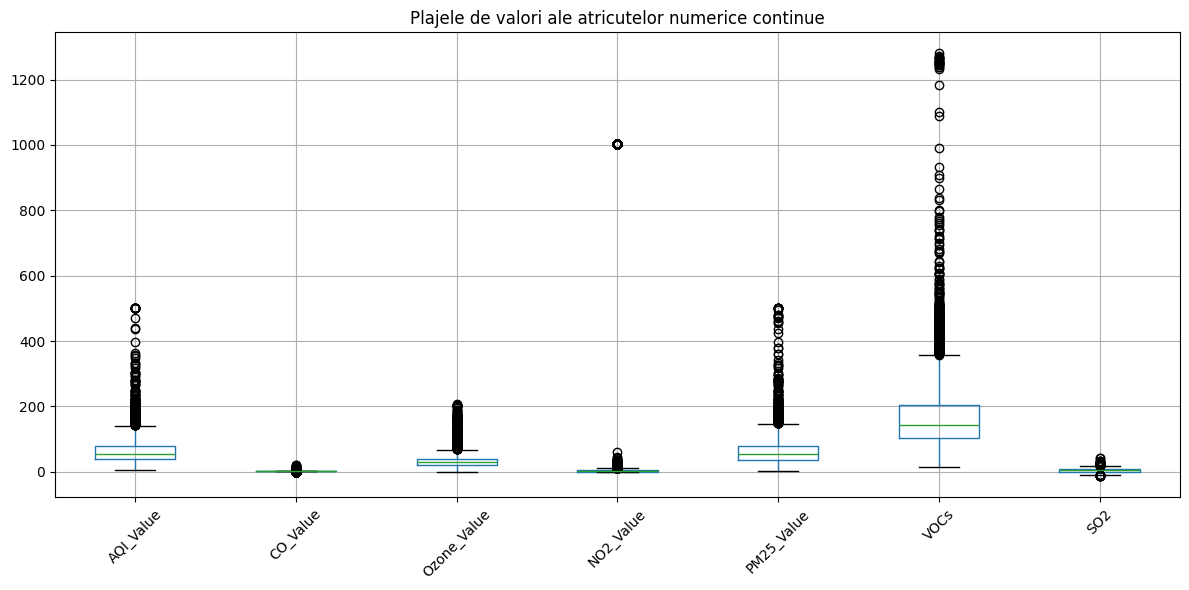

In [5]:
plot_boxplot(df_test, numeric_continuous)

Analiza atributelor categorice (discrete sau ordinale) 

In [6]:
discrete_or_ordinal_attributes = [
    "Country", "City", "CO_Category", "Ozone_Category",
    "NO2_Category", "PM25_Category", "Emissions", "AQI_Category"
]

def show_categorical_stats(df, attributes):
    cat_stats = pd.DataFrame({
        "count_non_missing": df[attributes].notnull().sum(),
        "num_unique_values": df[attributes].nunique()
    })
    return cat_stats


In [7]:
cat_stats_train = show_categorical_stats(df_train, discrete_or_ordinal_attributes)
cat_stats_train

,count_non_missing,num_unique_values
Country,18421,175
City,18770,18770
CO_Category,16877,2
Ozone_Category,18770,5
NO2_Category,18770,2
PM25_Category,18770,6
Emissions,18770,6
AQI_Category,18770,6


In [8]:
cat_stats_test = show_categorical_stats(df_test, discrete_or_ordinal_attributes)
cat_stats_test

,count_non_missing,num_unique_values
Country,4615,148
City,4692,4692
CO_Category,4240,1
Ozone_Category,4693,5
NO2_Category,4693,2
PM25_Category,4693,6
Emissions,4693,6
AQI_Category,4693,6


In [9]:
def plot_histogram_categorical_attributes(df, attributes, cat_stats):
    for attribute in attributes:
        plt.figure(figsize=(10, 4))

        num_unique = cat_stats.loc[attribute, "num_unique_values"]

        if num_unique > 10:
            df[attribute].value_counts().head(10).plot(kind='bar', width=0.6)
            plt.title(f"Cele mai frecvente 10 valori pentru '{attribute}'")
        else:
            df[attribute].value_counts().plot(kind='bar', width=0.6)
            plt.title(f"Distributia tuturor valorilor pentru '{attribute}'")

        plt.xlabel("Valori")
        plt.ylabel("Frecventa")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(axis='y')
        plt.show()

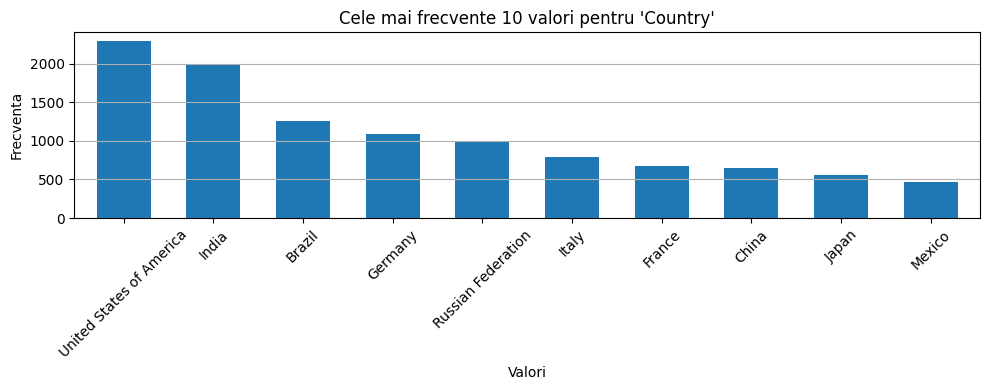

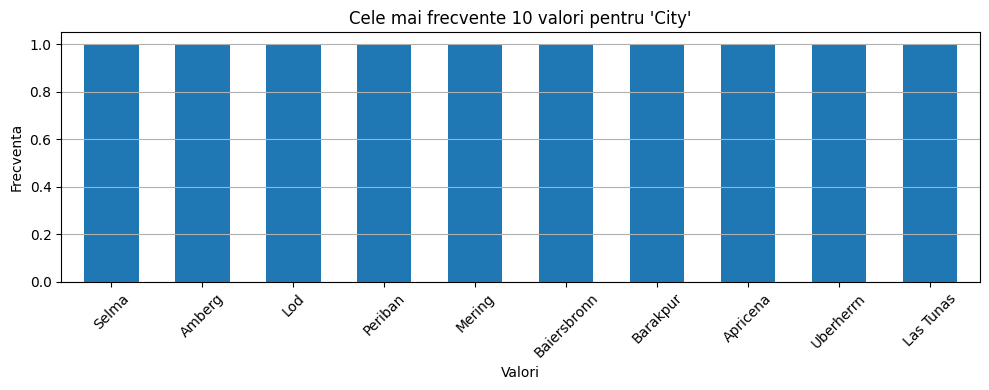

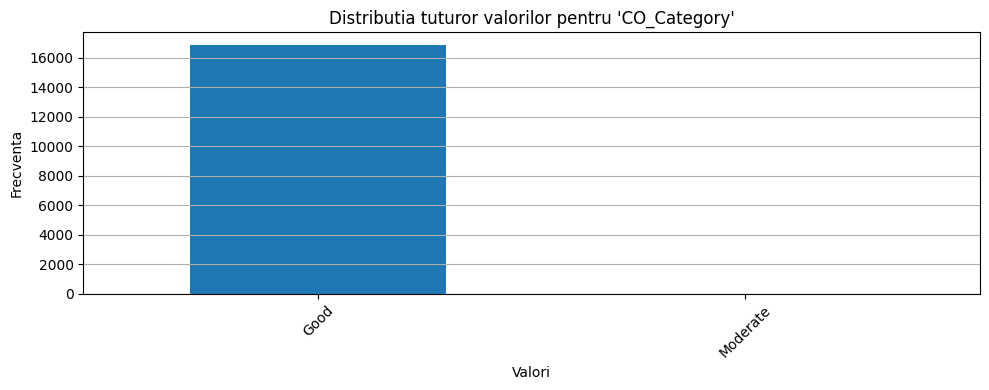

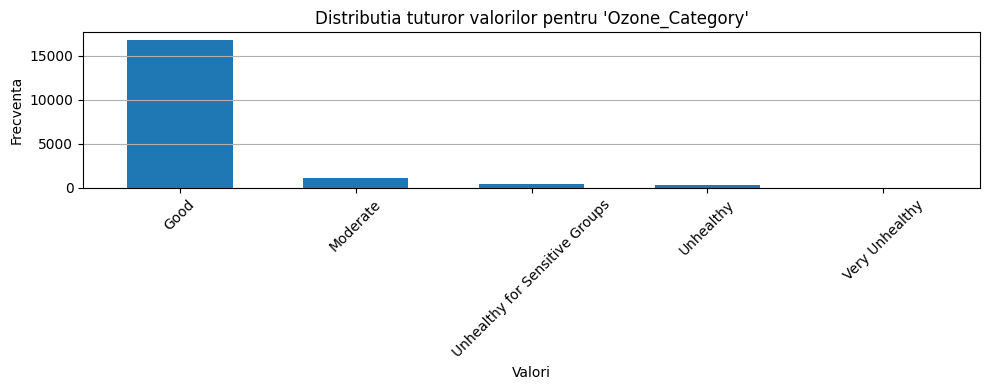

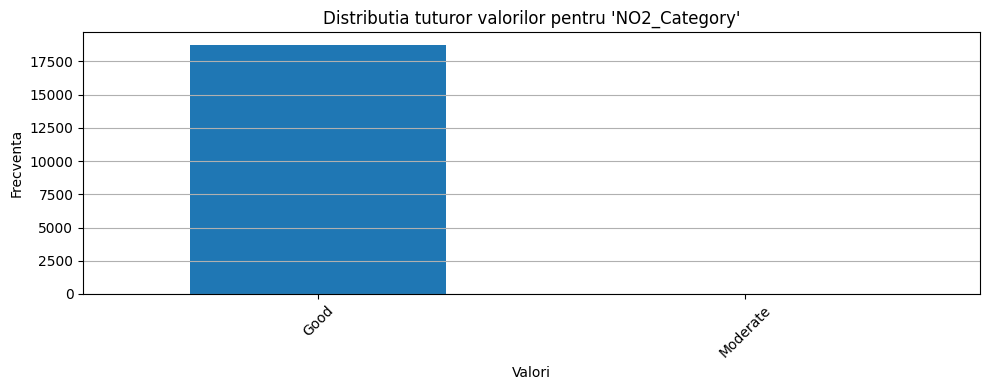

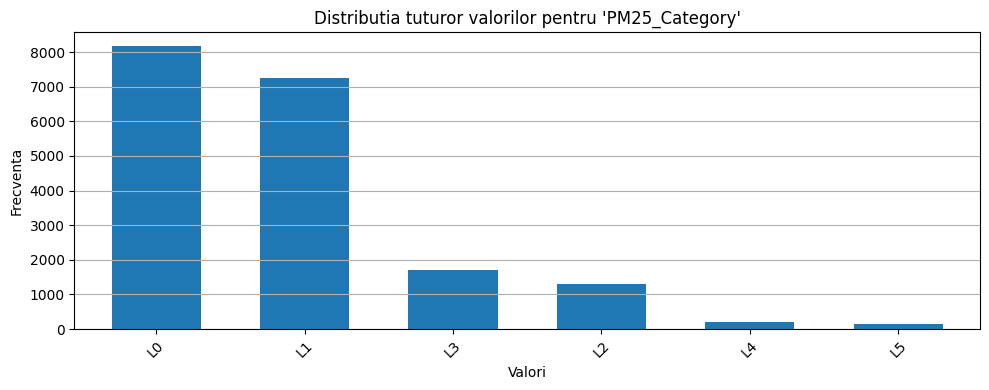

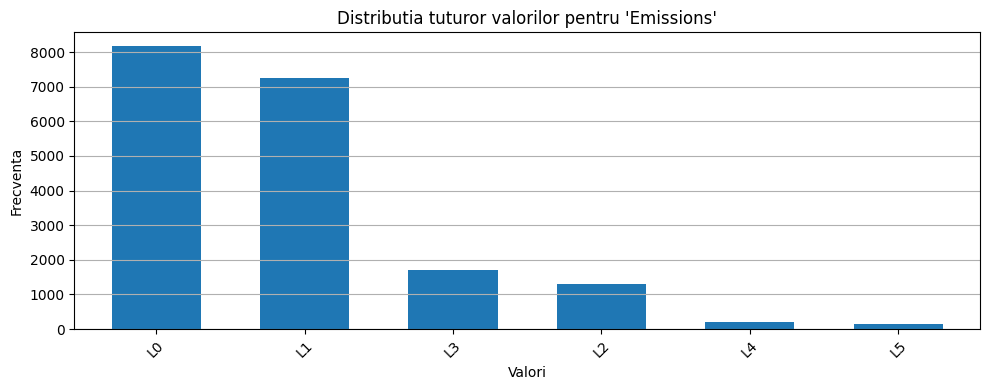

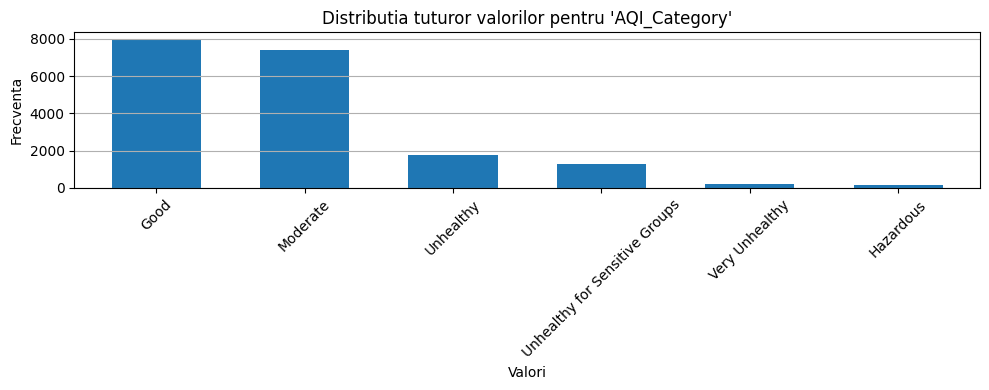

In [10]:

plot_histogram_categorical_attributes(df_train, discrete_or_ordinal_attributes, cat_stats_train)


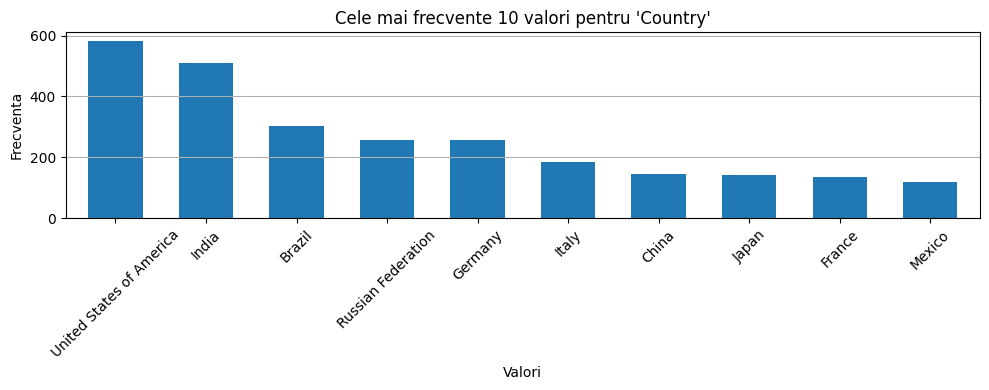

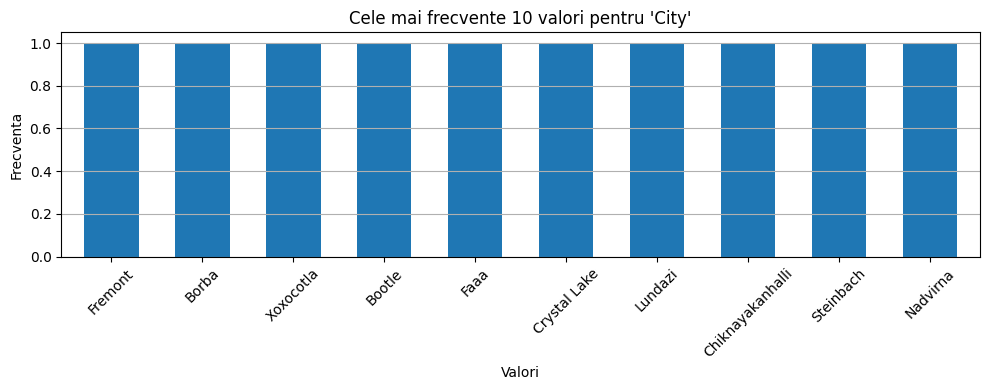

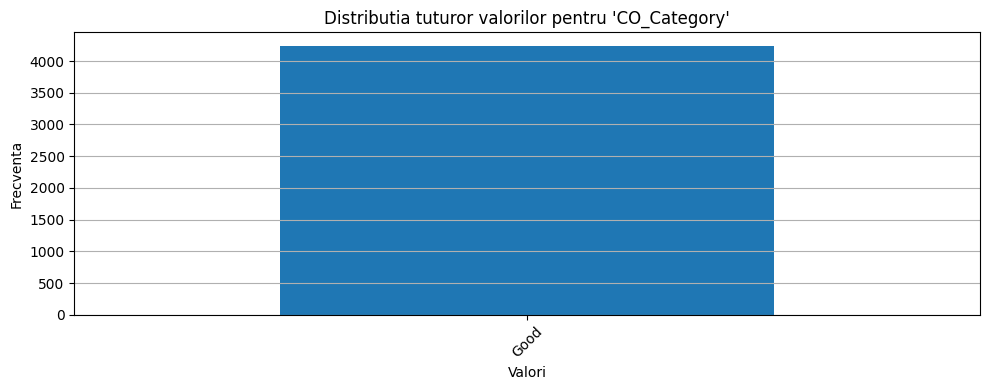

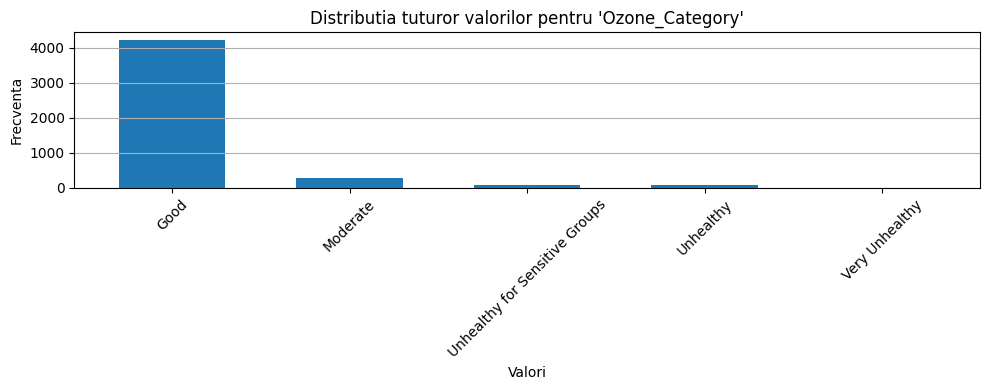

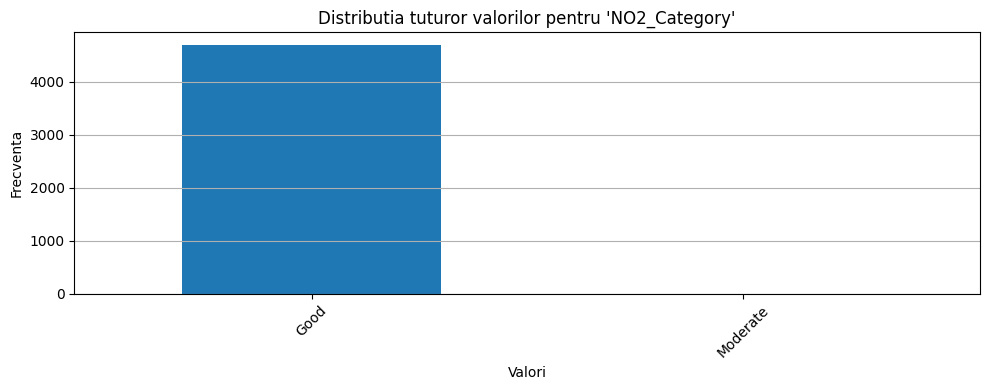

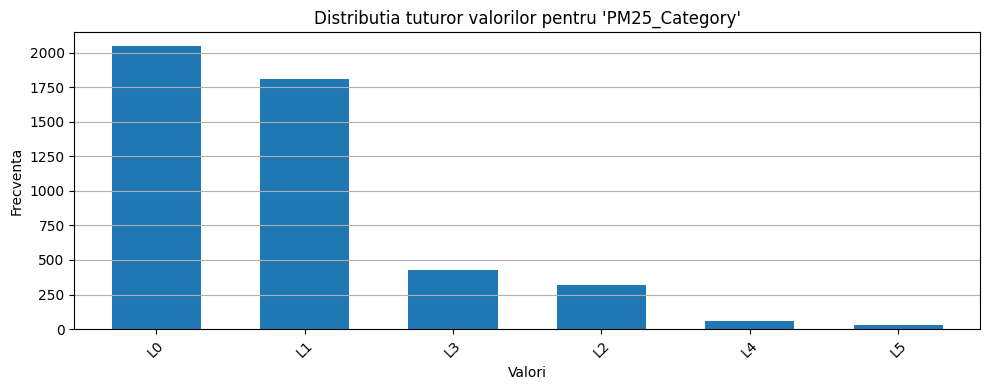

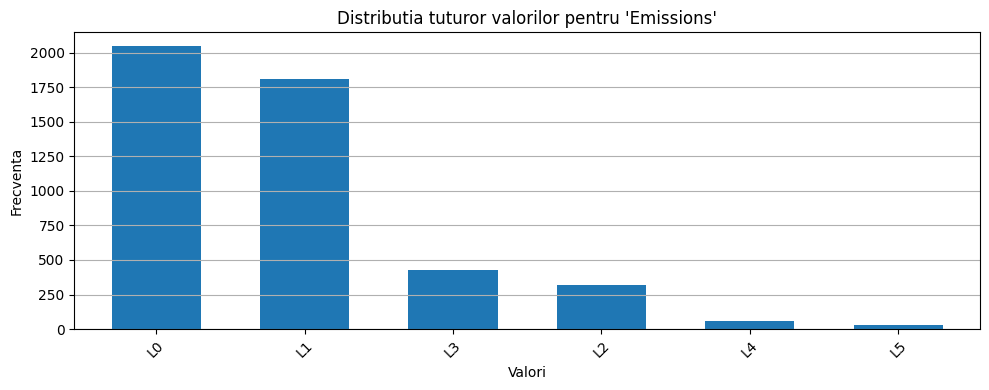

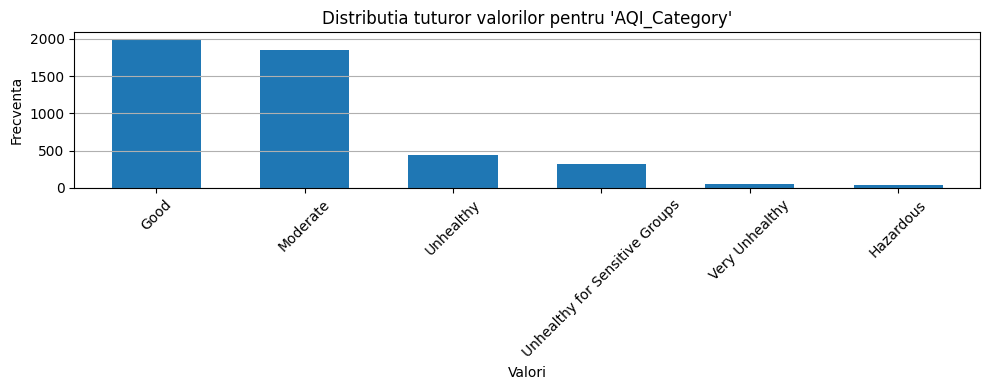

In [11]:
plot_histogram_categorical_attributes(df_test, discrete_or_ordinal_attributes, cat_stats_test)

Analiza echilibrului de clase

In [12]:
def barplot_classes_balance(df, attribute):
    plt.figure(figsize=(8, 4))
    ax = df[attribute].value_counts().plot(kind="bar", color="cornflowerblue")

    plt.title(f"Distributia claselor in setul de antrenare ({attribute})")
    plt.xlabel("Clasa")
    plt.ylabel("Numar de exemple")
    plt.grid(axis='y')
    plt.tight_layout()

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10)

    plt.show()


In [13]:
def barplot_classes_balance2(df, attribute):
    plt.figure(figsize=(8, 4))
    ax = df[attribute].value_counts().plot(kind="bar", color="cornflowerblue")

    plt.title(f"Distributia claselor in setul de test ({attribute})")
    plt.xlabel("Clasa")
    plt.ylabel("Numar de exemple")
    plt.grid(axis='y')
    plt.tight_layout()

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10)

    plt.show()


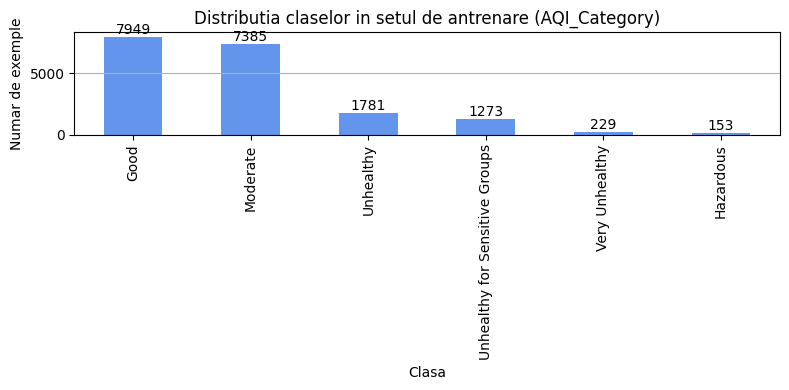

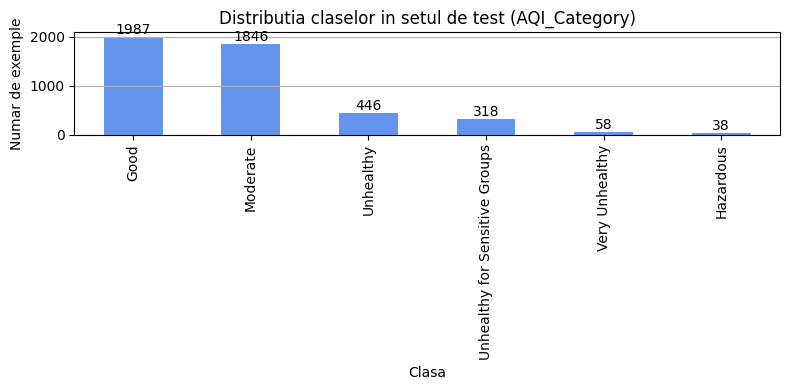

In [14]:
barplot_classes_balance(df_train, "AQI_Category")
barplot_classes_balance2(df_test, "AQI_Category")

Analiza corelatiei intre atribute

a) pentru atributele numerice continue

In [15]:

def analyze_correlation_for_numeric_attributes(df, continous_attributes):
    corr_matrix = df[continous_attributes].corr(method="pearson")
    print("Matricea de corelatie (Pearson):")
    print(corr_matrix)      
    plt.figure(figsize=(8, 6))
    plt.matshow(corr_matrix, cmap="coolwarm", fignum=1)
    plt.colorbar()
    plt.xticks(range(len(continous_attributes)), continous_attributes, rotation=45)
    plt.yticks(range(len(continous_attributes)), continous_attributes)
    plt.title("Matricea de corelatie intre atributele numerice continue", pad=20)
    plt.tight_layout()
    plt.show()
    corr_matrix = df[continous_attributes].corr(method="pearson")

Matricea de corelatie (Pearson):
             AQI_Value  CO_Value  Ozone_Value  NO2_Value  PM25_Value  \
AQI_Value     1.000000  0.428791     0.404818  -0.000878    0.984160   
CO_Value      0.428791  1.000000     0.136047   0.005495    0.437300   
Ozone_Value   0.404818  0.136047     1.000000  -0.019737    0.340110   
NO2_Value    -0.000878  0.005495    -0.019737   1.000000   -0.000354   
PM25_Value    0.984160  0.437300     0.340110  -0.000354    1.000000   
VOCs          0.997472  0.427156     0.402478  -0.001405    0.981831   
SO2           0.247178  0.568347     0.075333   0.010368    0.249781   

                 VOCs       SO2  
AQI_Value    0.997472  0.247178  
CO_Value     0.427156  0.568347  
Ozone_Value  0.402478  0.075333  
NO2_Value   -0.001405  0.010368  
PM25_Value   0.981831  0.249781  
VOCs         1.000000  0.245615  
SO2          0.245615  1.000000  


/tmp/ipykernel_11129/1813386460.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


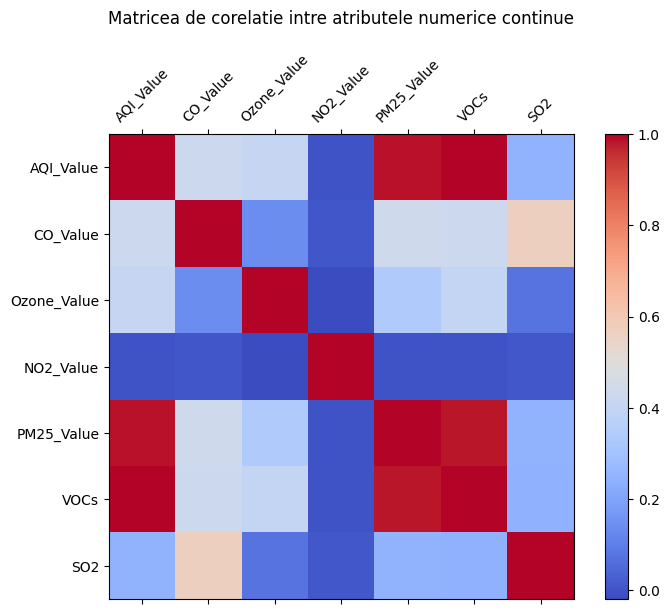

In [16]:
analyze_correlation_for_numeric_attributes(df_train, numeric_continuous)

Matricea de corelatie (Pearson):
             AQI_Value  CO_Value  Ozone_Value  NO2_Value  PM25_Value  \
AQI_Value     1.000000  0.463741     0.392653   0.004143    0.985049   
CO_Value      0.463741  1.000000     0.178400   0.003553    0.470451   
Ozone_Value   0.392653  0.178400     1.000000  -0.012257    0.328927   
NO2_Value     0.004143  0.003553    -0.012257   1.000000    0.004253   
PM25_Value    0.985049  0.470451     0.328927   0.004253    1.000000   
VOCs          0.997362  0.461426     0.391071   0.004604    0.982563   
SO2           0.218285  0.433925     0.088500   0.000405    0.223713   

                 VOCs       SO2  
AQI_Value    0.997362  0.218285  
CO_Value     0.461426  0.433925  
Ozone_Value  0.391071  0.088500  
NO2_Value    0.004604  0.000405  
PM25_Value   0.982563  0.223713  
VOCs         1.000000  0.217414  
SO2          0.217414  1.000000  


/tmp/ipykernel_11129/1813386460.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


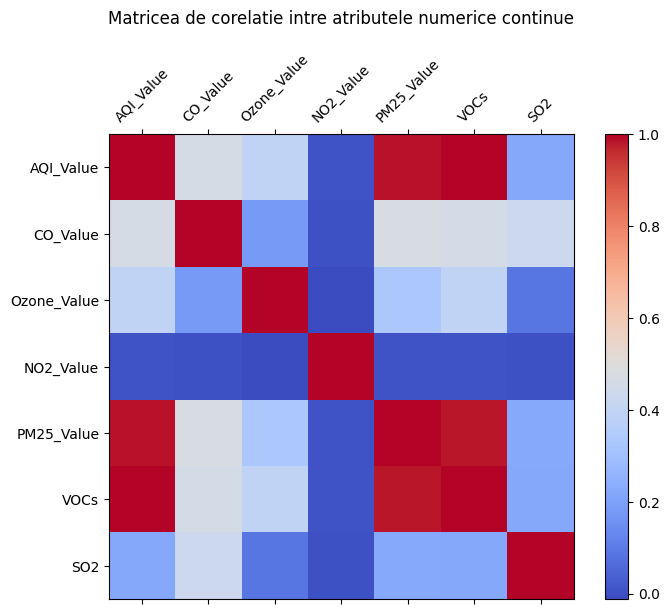

In [17]:
analyze_correlation_for_numeric_attributes(df_test, numeric_continuous)

b) pentru atributele categorice

In [18]:
from scipy.stats import chi2_contingency

def analyze_correlation_for_categorical_attributes(df, discrete_or_ordinal_attributes_list):
    chi2_results = []

    for i in range(len(discrete_or_ordinal_attributes_list)):
        for j in range(i + 1, len(discrete_or_ordinal_attributes_list)):
            attr1 = discrete_or_ordinal_attributes_list[i]
            attr2 = discrete_or_ordinal_attributes_list[j]

            try:
                contingency = pd.crosstab(df[attr1], df[attr2])

                chi2_stat, p_val, dof, expected = chi2_contingency(contingency)

                chi2_results.append({
                    "Attribute 1": attr1,
                    "Attribute 2": attr2,
                    "p-value": p_val
                })

            except Exception as e:
                chi2_results.append({
                    "Attribute 1": attr1,
                    "Attribute 2": attr2,
                    "p-value": None,
                    "error": str(e)
                })

    chi2_df = pd.DataFrame(chi2_results)
    chi2_df_sorted = chi2_df.sort_values(by="p-value", na_position="last")
    return chi2_df_sorted



In [19]:

chi2_df_train = analyze_correlation_for_categorical_attributes(df_train, discrete_or_ordinal_attributes)
chi2_df_train

,Attribute 1,Attribute 2,p-value
2,Country,Ozone_Category,0.000000e+00
6,Country,AQI_Category,0.000000e+00
5,Country,Emissions,0.000000e+00
4,Country,PM25_Category,0.000000e+00
25,PM25_Category,Emissions,0.000000e+00
21,Ozone_Category,AQI_Category,0.000000e+00
20,Ozone_Category,Emissions,0.000000e+00
19,Ozone_Category,PM25_Category,0.000000e+00
27,Emissions,AQI_Category,0.000000e+00
26,PM25_Category,AQI_Category,0.000000e+00


In [20]:

chi2_df_test = analyze_correlation_for_categorical_attributes(df_test, discrete_or_ordinal_attributes)
chi2_df_test

,Attribute 1,Attribute 2,p-value
5,Country,Emissions,0.000000e+00
6,Country,AQI_Category,0.000000e+00
4,Country,PM25_Category,0.000000e+00
21,Ozone_Category,AQI_Category,0.000000e+00
25,PM25_Category,Emissions,0.000000e+00
26,PM25_Category,AQI_Category,0.000000e+00
27,Emissions,AQI_Category,0.000000e+00
20,Ozone_Category,Emissions,2.231502e-182
19,Ozone_Category,PM25_Category,2.231502e-182
2,Country,Ozone_Category,5.822991e-126


3.2. Preprocesarea datelor

1. Identificarea datelor lipsa

In [21]:
def identify_attributes_with_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
    return missing_values

In [22]:
identify_attributes_with_missing_values(df_train)

CO_Category    1893
Ozone_Value    1870
Country         349
dtype: int64

In [23]:
identify_attributes_with_missing_values(df_test)

Ozone_Value    476
CO_Category    453
Country         78
City             1
dtype: int64

A. Imputarea univariata

In [24]:
from sklearn.impute import SimpleImputer

def univariate_imputation(df, strategy, columns):
    imputer = SimpleImputer(strategy=strategy)
    df[columns] = imputer.fit_transform(df[columns])
    return df


In [25]:
df_train_simple_imputed = df_train.copy()
df_train_simple_imputed = univariate_imputation(df_train_simple_imputed, strategy='median', columns=["Ozone_Value"])
df_train_simple_imputed = univariate_imputation(df_train_simple_imputed, strategy='most_frequent', columns=["CO_Category"])
df_train_simple_imputed = univariate_imputation(df_train_simple_imputed, strategy='most_frequent', columns=["Country"])

Verificam daca mai exista valori lipsa dupa imputare

In [26]:
missing_values_imputed_train = df_train_simple_imputed.isnull().sum()
missing_values_imputed_train = missing_values_imputed_train[missing_values_imputed_train > 0].sort_values(ascending=False)
missing_values_imputed_train

Series([], dtype: int64)

In [27]:
df_test_simple_imputed = df_test.copy()
df_test_simple_imputed = univariate_imputation(df_test_simple_imputed, strategy='median', columns=["Ozone_Value"])
df_test_simple_imputed = univariate_imputation(df_test_simple_imputed, strategy='most_frequent', columns=["CO_Category"])
df_test_simple_imputed = univariate_imputation(df_test_simple_imputed, strategy='most_frequent', columns=["Country"])
df_test_simple_imputed = univariate_imputation(df_test_simple_imputed, strategy='most_frequent', columns=["City"])

Verificam daca mai exista valori lipsa dupa imputare

In [28]:
missing_values_imputed_test = df_test_simple_imputed.isnull().sum()
missing_values_imputed_test = missing_values_imputed_test[missing_values_imputed_test > 0].sort_values(ascending=False)
missing_values_imputed_test

Series([], dtype: int64)

B) Imputare multivariata

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

df_iterative_imputed_train = df_train.copy()

# Imputare multivariată cu IterativeImputer (functioneaza doar pe atributele numerice,
# deci il aplicam doar pentru a completa valorile lipsa pentru Ozone_Value,
# restul (CO_Category si Country) vor fi completate prin imputare univariata)
iter_imputer = IterativeImputer(random_state=0)
df_iterative_imputed_train[numeric_continuous] = iter_imputer.fit_transform(df_iterative_imputed_train[numeric_continuous])


categorical_with_nan = ["CO_Category", "Country"]

cat_imputer = SimpleImputer(strategy="most_frequent")
df_iterative_imputed_train[categorical_with_nan] = cat_imputer.fit_transform(df_iterative_imputed_train[categorical_with_nan])



In [30]:

df_iterative_imputed_test = df_test.copy()

iter_imputer = IterativeImputer(random_state=0)
df_iterative_imputed_test[numeric_continuous] = iter_imputer.fit_transform(df_iterative_imputed_test[numeric_continuous])


categorical_with_nan = ["CO_Category", "Country", "City"]

cat_imputer = SimpleImputer(strategy="most_frequent")
df_iterative_imputed_test[categorical_with_nan] = cat_imputer.fit_transform(df_iterative_imputed_test[categorical_with_nan])



In [31]:

def compare_stats_after_imputations_numeric_attr(df, df_simple_imputed, df_iterative_imputed):
    original_stats = df[numeric_continuous].describe().T
    original_stats["Source"] = "Original (cu NaN)"

    simple_stats = df_simple_imputed[numeric_continuous].describe().T
    simple_stats["Source"] = "SimpleImputer"

    iterative_stats = df_iterative_imputed[numeric_continuous].describe().T
    iterative_stats["Source"] = "IterativeImputer"

    all_stats = pd.concat([original_stats, simple_stats, iterative_stats])
    all_stats = all_stats[["Source", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]]

    return all_stats


In [32]:
all_stats_train = compare_stats_after_imputations_numeric_attr(df_train, df_train_simple_imputed, df_iterative_imputed_train)
all_stats_train

,Source,count,mean,std,min,25%,50%,75%,max
AQI_Value,Original (cu NaN),18770.0,71.981726,56.110722,7.000000,39.000000,55.000000,79.000000,500.000000
CO_Value,Original (cu NaN),18770.0,1.378476,1.932713,0.000000,1.000000,1.000000,1.000000,133.000000
Ozone_Value,Original (cu NaN),16900.0,35.372781,28.422401,0.000000,21.000000,31.000000,40.000000,222.000000
NO2_Value,Original (cu NaN),18770.0,43.133438,196.182302,0.000000,0.000000,1.000000,4.000000,1003.063334
PM25_Value,Original (cu NaN),18770.0,68.490996,54.717105,0.000000,35.000000,54.000000,78.000000,500.000000
VOCs,Original (cu NaN),18770.0,185.006426,140.651248,12.415670,103.092298,142.817708,203.969738,1280.988229
SO2,Original (cu NaN),18770.0,4.461538,6.077151,-18.528019,0.734223,4.286593,7.936256,234.692971
AQI_Value,SimpleImputer,18770.0,71.981726,56.110722,7.000000,39.000000,55.000000,79.000000,500.000000
CO_Value,SimpleImputer,18770.0,1.378476,1.932713,0.000000,1.000000,1.000000,1.000000,133.000000
Ozone_Value,SimpleImputer,18770.0,34.937134,27.001145,0.000000,22.000000,31.000000,39.000000,222.000000


In [33]:
all_stats_test = compare_stats_after_imputations_numeric_attr(df_test, df_test_simple_imputed, df_iterative_imputed_test)
all_stats_test

,Source,count,mean,std,min,25%,50%,75%,max
AQI_Value,Original (cu NaN),4693.0,72.127424,55.838493,6.000000,39.000000,55.000000,80.000000,500.000000
CO_Value,Original (cu NaN),4693.0,1.327935,1.356232,0.000000,1.000000,1.000000,1.000000,21.000000
Ozone_Value,Original (cu NaN),4217.0,34.706189,27.023739,0.000000,21.000000,30.000000,40.000000,207.000000
NO2_Value,Original (cu NaN),4693.0,42.887032,195.686936,0.000000,0.000000,1.000000,4.000000,1003.063334
PM25_Value,Original (cu NaN),4693.0,68.634775,55.118326,2.000000,35.000000,54.000000,80.000000,500.000000
VOCs,Original (cu NaN),4693.0,185.239825,139.841721,15.461284,103.767142,143.413477,205.616347,1279.853139
SO2,Original (cu NaN),4693.0,4.393056,5.431688,-13.338278,0.741786,4.288641,7.814964,41.595139
AQI_Value,SimpleImputer,4693.0,72.127424,55.838493,6.000000,39.000000,55.000000,80.000000,500.000000
CO_Value,SimpleImputer,4693.0,1.327935,1.356232,0.000000,1.000000,1.000000,1.000000,21.000000
Ozone_Value,SimpleImputer,4693.0,34.228851,25.655699,0.000000,22.000000,30.000000,39.000000,207.000000


In [34]:
def compare_stats_after_imputations_categorical_attr(df, df_simple_imputed, df_iterative_imputed):
    original_cat = df[discrete_or_ordinal_attributes].describe().T
    original_cat["Source"] = "Original (cu NaN)"

    simple_cat = df_simple_imputed[discrete_or_ordinal_attributes].describe().T
    simple_cat["Source"] = "SimpleImputer"

    iterative_cat = df_iterative_imputed[discrete_or_ordinal_attributes].describe().T
    iterative_cat["Source"] = "IterativeImputer"

    all_cat_stats = pd.concat([original_cat, simple_cat, iterative_cat])
    all_cat_stats = all_cat_stats[["Source", "count", "unique", "top", "freq"]]

    return all_cat_stats

In [35]:
all_cat_stats_train = compare_stats_after_imputations_categorical_attr(df_train, df_train_simple_imputed, df_iterative_imputed_train)
all_cat_stats_train

,Source,count,unique,top,freq
Country,Original (cu NaN),18421,175,United States of America,2290
City,Original (cu NaN),18770,18770,Selma,1
CO_Category,Original (cu NaN),16877,2,Good,16875
Ozone_Category,Original (cu NaN),18770,5,Good,16842
NO2_Category,Original (cu NaN),18770,2,Good,18756
PM25_Category,Original (cu NaN),18770,6,L0,8163
Emissions,Original (cu NaN),18770,6,L0,8163
AQI_Category,Original (cu NaN),18770,6,Good,7949
Country,SimpleImputer,18770,175,United States of America,2639
City,SimpleImputer,18770,18770,Selma,1


In [36]:
all_cat_stats_test = compare_stats_after_imputations_categorical_attr(df_test, df_test_simple_imputed, df_iterative_imputed_test)
all_cat_stats_test

,Source,count,unique,top,freq
Country,Original (cu NaN),4615,148,United States of America,582
City,Original (cu NaN),4692,4692,Fremont,1
CO_Category,Original (cu NaN),4240,1,Good,4240
Ozone_Category,Original (cu NaN),4693,5,Good,4227
NO2_Category,Original (cu NaN),4693,2,Good,4692
PM25_Category,Original (cu NaN),4693,6,L0,2045
Emissions,Original (cu NaN),4693,6,L0,2045
AQI_Category,Original (cu NaN),4693,6,Good,1987
Country,SimpleImputer,4693,148,United States of America,660
City,SimpleImputer,4693,4692,Aabenraa,2


2. Valori extreme pentru un atribut într-un eșantion


Pasul 1: Detectarea outlierilor cu ajutorul metodei IQR (Inter-Quartile Range)

Pentru ca aceste valori extreme sa nu ne influenteze in mod negativ predictiile, le vom ignora (adica ne vom comporta ca si cand nu au fost niciodata acolo, deci le vom trata ca pe niste valori lipsa). Fiecare outlier va fi inlocuit cu NaN, pentru ca ulterior sa putem aplica una dintre metodele de imputare prezentate anterior. 

In [37]:
missing_values = df_train_simple_imputed.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values


Series([], dtype: int64)

In [38]:
missing_values = df_test_simple_imputed.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

Series([], dtype: int64)

In [39]:
import numpy as np

def detect_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.2)
        Q3 = df[col].quantile(0.8)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Valorile considerate outlieri sunt eliminate (devin NaN)
        df[col] = df[col].mask(
            (df[col] < lower_bound) | (df[col] > upper_bound),
            np.nan
        )




In [40]:

df_outliers_simple_train = df_train_simple_imputed.copy()
detect_outliers_iqr(df_outliers_simple_train, numeric_continuous)

Afiseaza numarul de valori Nan care au aparut in urma eliminarii outlier-ilor (grupate dupa atribut)

In [41]:
df_outliers_simple_train[numeric_continuous].isnull().sum()


AQI_Value       726
CO_Value       1024
Ozone_Value    1021
NO2_Value      1723
PM25_Value      574
VOCs            782
SO2              97
dtype: int64

In [42]:

df_outliers_simple_test = df_test_simple_imputed.copy()
detect_outliers_iqr(df_outliers_simple_test, numeric_continuous)

In [43]:
df_outliers_simple_test[numeric_continuous].isnull().sum()


AQI_Value      182
CO_Value       245
Ozone_Value    237
NO2_Value      436
PM25_Value     144
VOCs           199
SO2             22
dtype: int64

In [44]:

def plot_histogram_outliers(df_simple_imputed, df_outliers_simple, numeric_continuous):
    for col in numeric_continuous:
        plt.figure(figsize=(10, 4))
        
        plt.hist(df_simple_imputed[col], bins=50, alpha=0.5, label="Original cu outlieri")
        plt.hist(df_outliers_simple[col].dropna(), bins=50, alpha=0.5, label="Fără outlieri")
        
        plt.title(f"Distribuție valori pentru {col}")
        plt.xlabel("Valoare")
        plt.ylabel("Frecvență")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


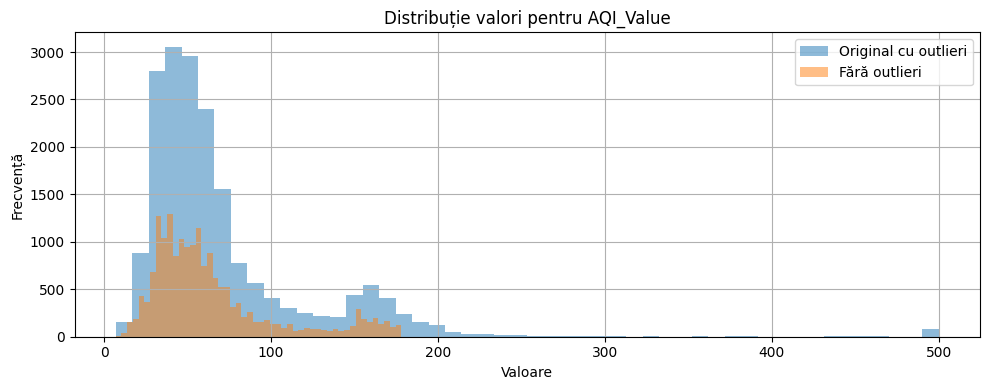

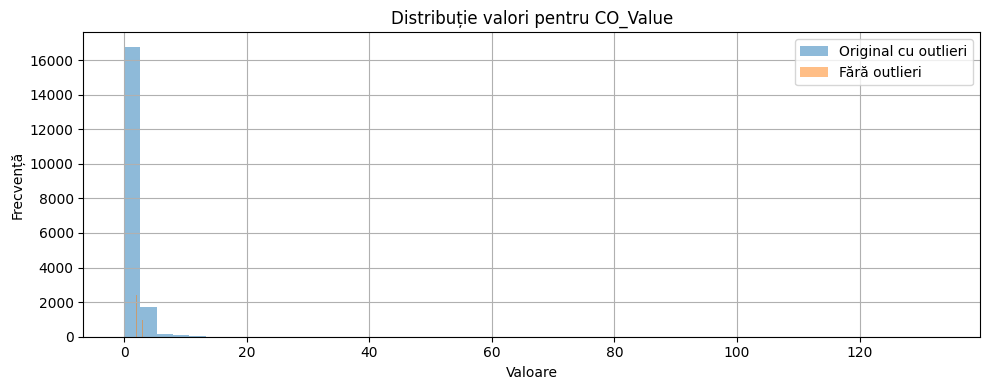

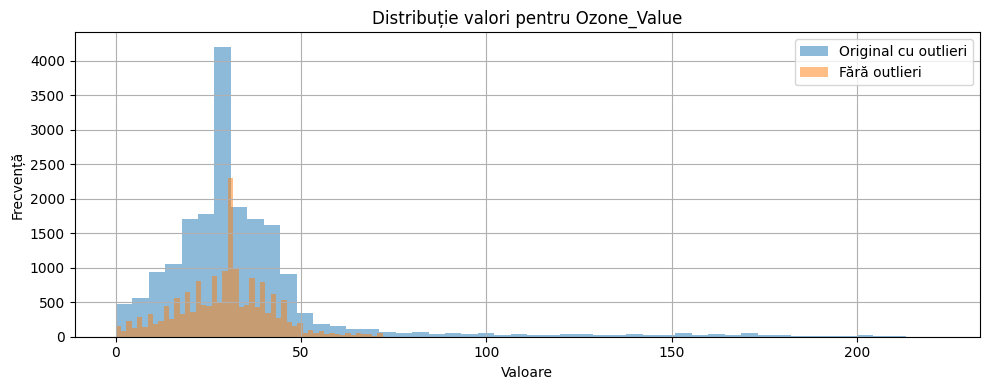

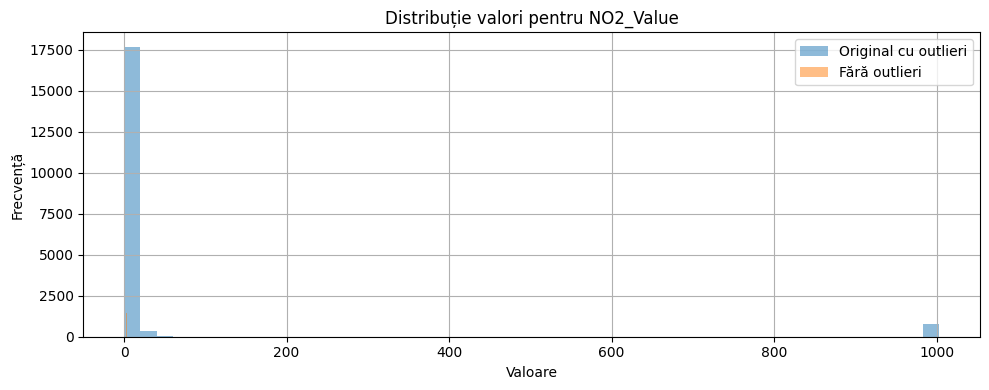

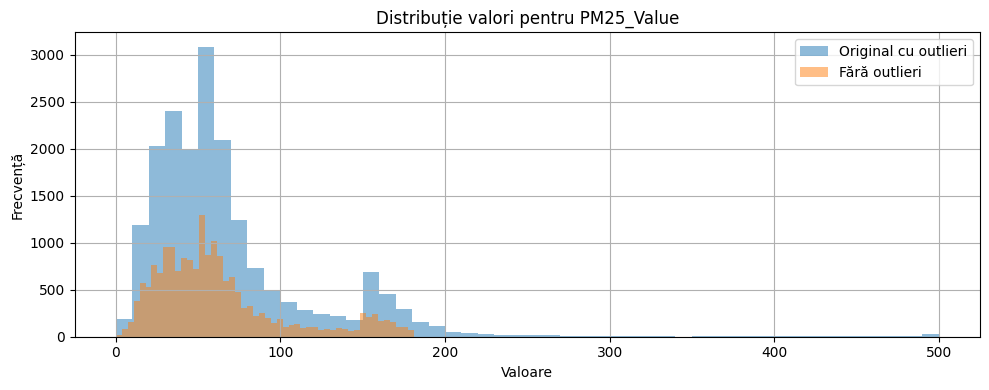

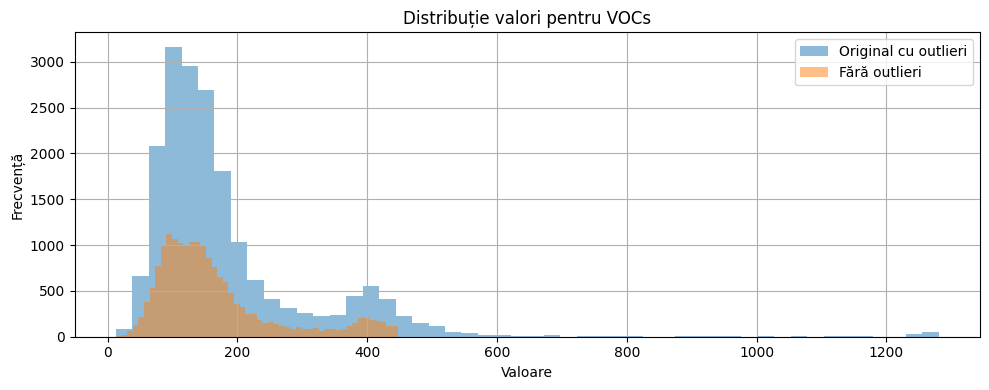

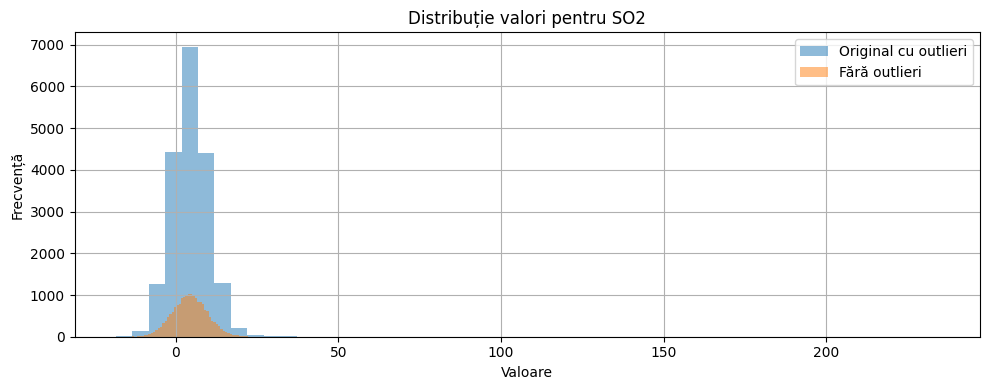

In [45]:
plot_histogram_outliers(df_train_simple_imputed, df_outliers_simple_train, numeric_continuous)

Pasul 2: Imputarea valorilor lipsa

Acum ca am inlocuit cu Nan valorile extreme, trebuie sa aplicam o metoda de imputare: cea univariata sau cea multivariata

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df_outliers_simple_train[numeric_continuous] = imputer.fit_transform(df_outliers_simple_train[numeric_continuous])

# Verificăm dacă mai sunt valori lipsă => Daca nu mai sunt, atunci inseamna ca toti oulierii au fost inlocuiti
df_outliers_simple_train[numeric_continuous].isnull().sum()


AQI_Value      0
CO_Value       0
Ozone_Value    0
NO2_Value      0
PM25_Value     0
VOCs           0
SO2            0
dtype: int64

In [47]:
imputer = SimpleImputer(strategy="median")
df_outliers_simple_test[numeric_continuous] = imputer.fit_transform(df_outliers_simple_test[numeric_continuous])

# Verificăm dacă mai sunt valori lipsă => Daca nu mai sunt, atunci inseamna ca toti oulierii au fost inlocuiti
df_outliers_simple_test[numeric_continuous].isnull().sum()

AQI_Value      0
CO_Value       0
Ozone_Value    0
NO2_Value      0
PM25_Value     0
VOCs           0
SO2            0
dtype: int64

In [48]:
def plot_histogram_outliers_after_imputation(df_simple_imputed, df_outliers_simple, numeric_continuous):
    for col in numeric_continuous:
        plt.figure(figsize=(10, 4))

        plt.hist(df_simple_imputed[col], bins=50, alpha=0.5, label="Imputare simplă inițială")
        plt.hist(df_outliers_simple[col], bins=50, alpha=0.5, label="După outlier + imputare")
        
        plt.title(f"Distribuție valori pentru {col}")
        plt.xlabel("Valoare")
        plt.ylabel("Frecvență")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

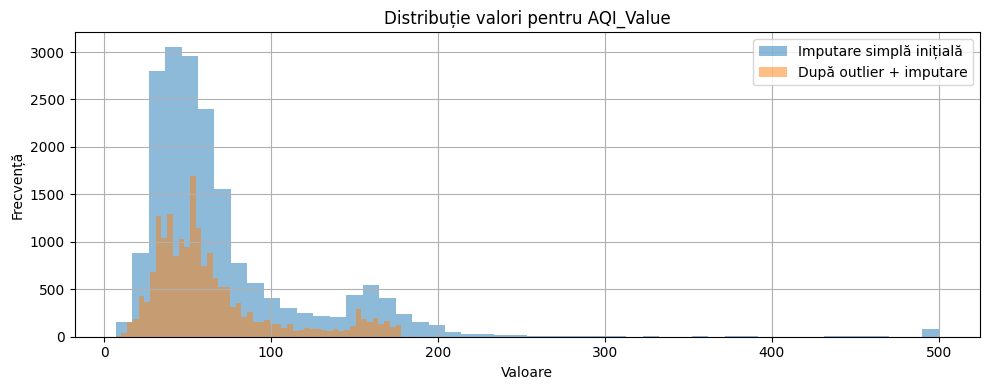

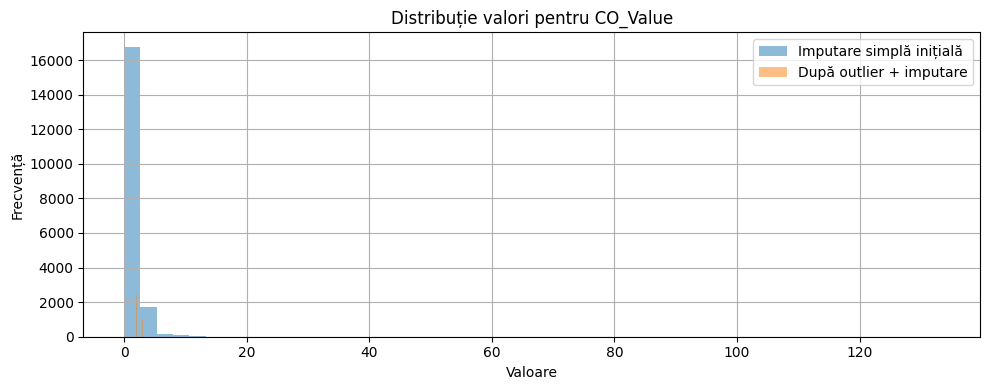

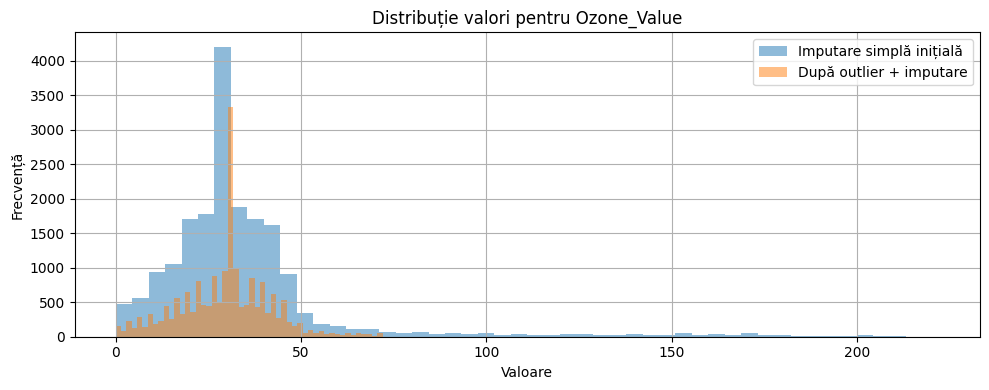

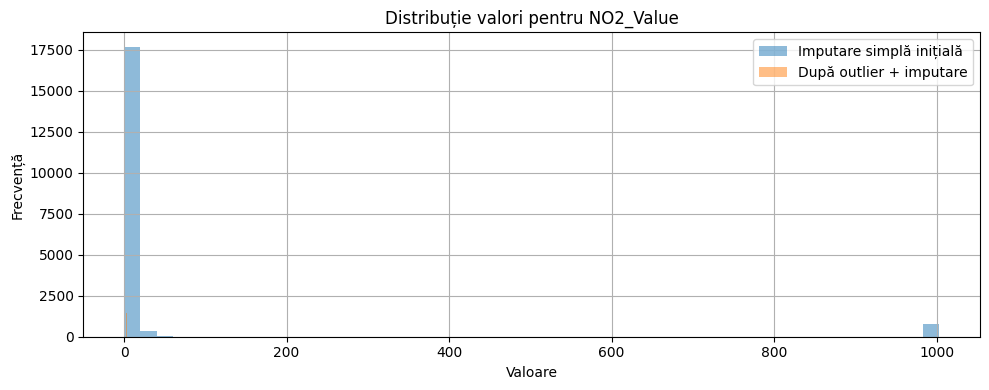

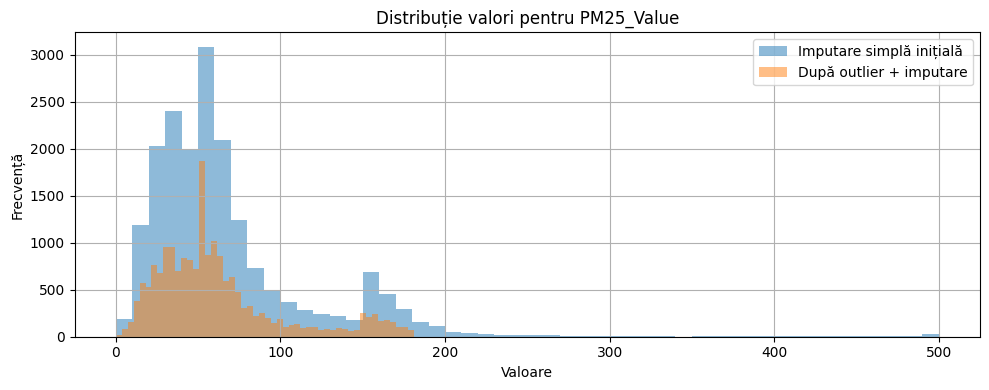

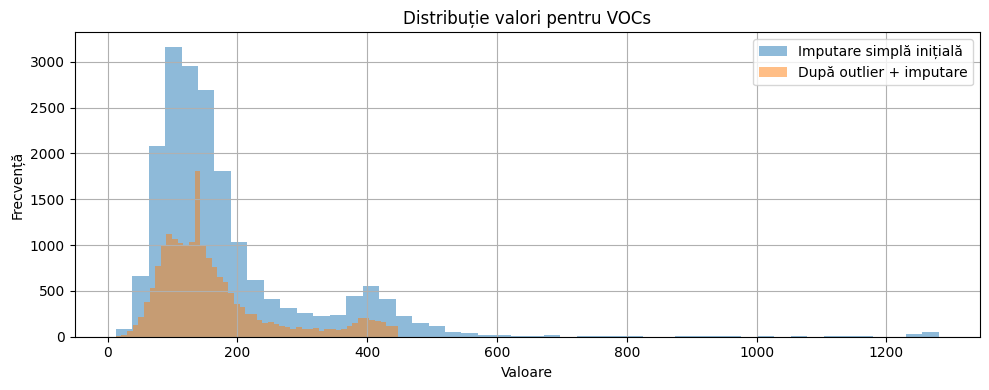

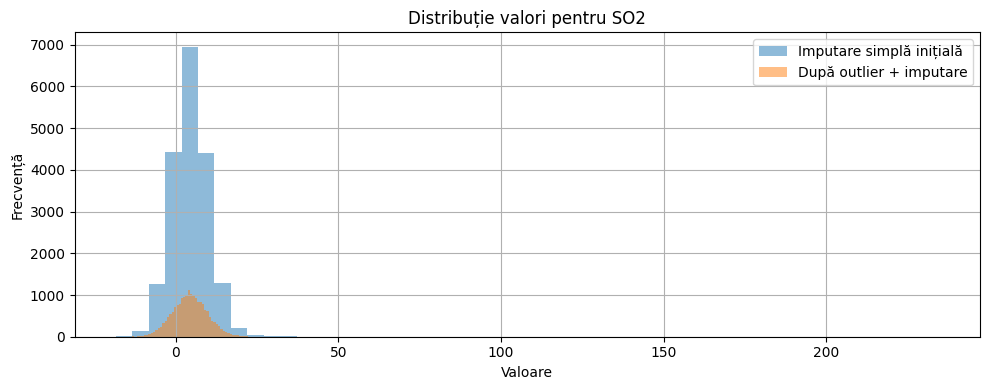

In [49]:
plot_histogram_outliers_after_imputation(df_train_simple_imputed, df_outliers_simple_train, numeric_continuous)


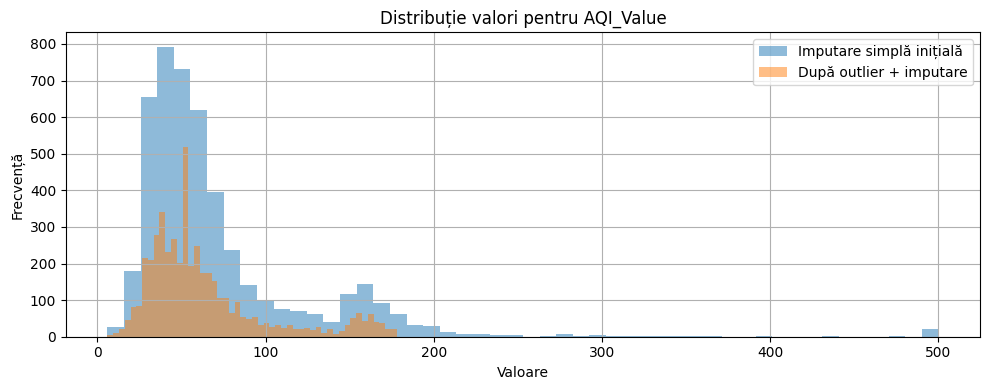

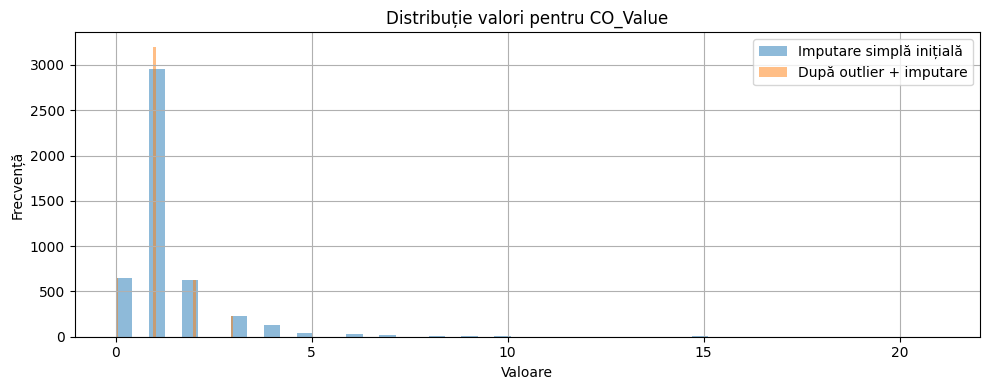

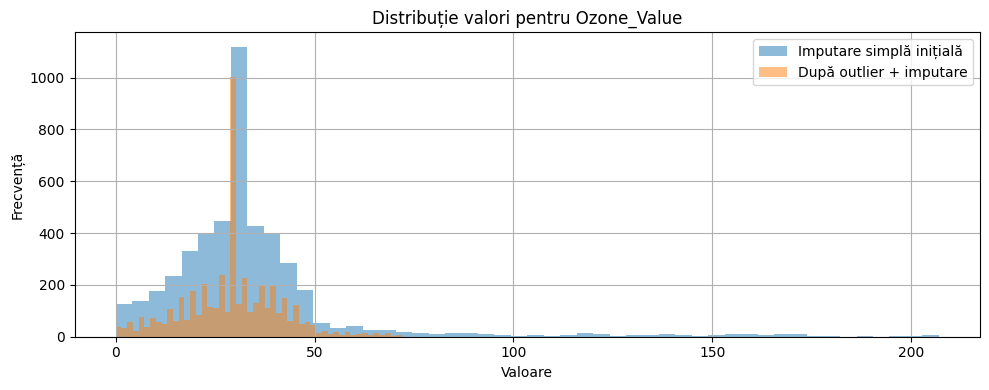

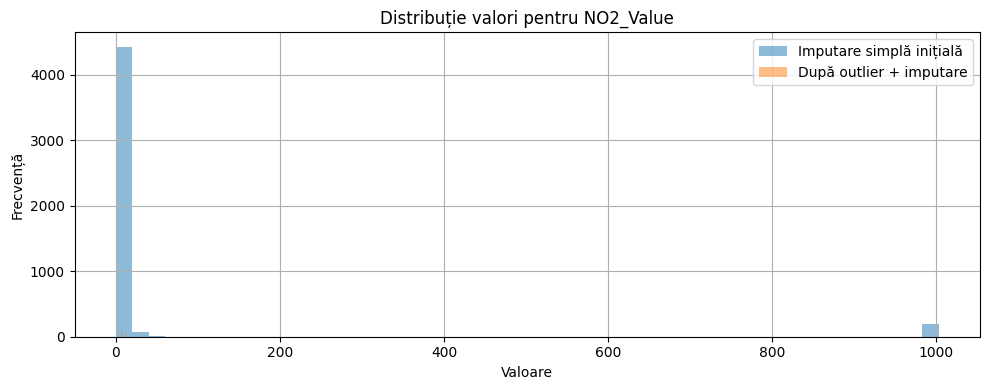

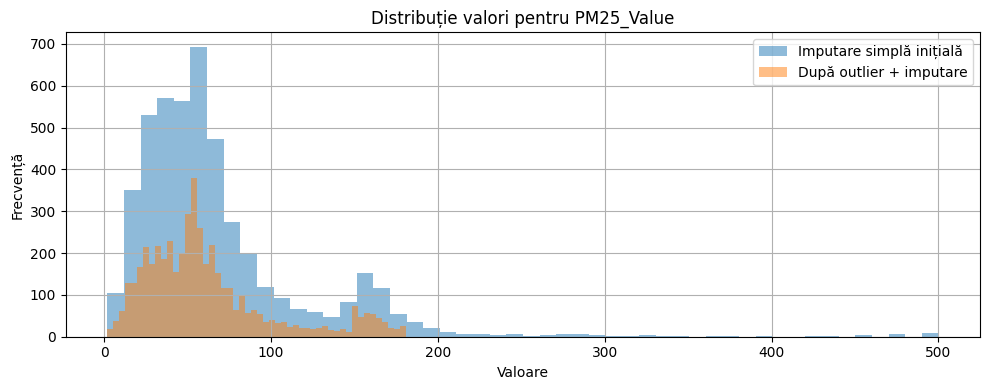

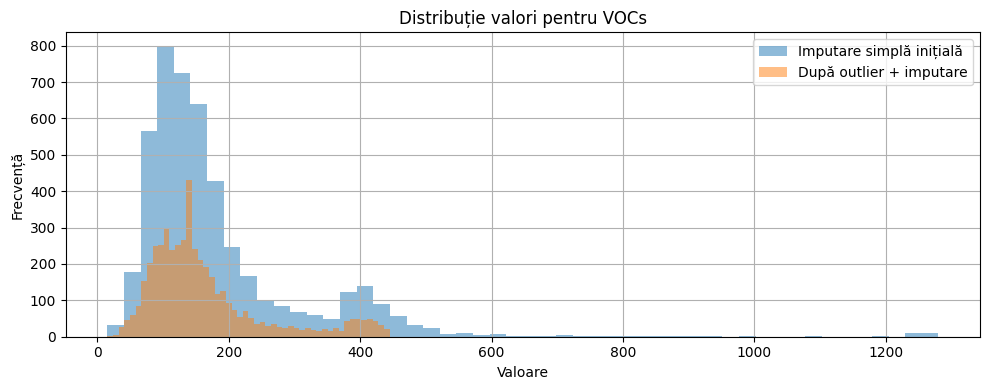

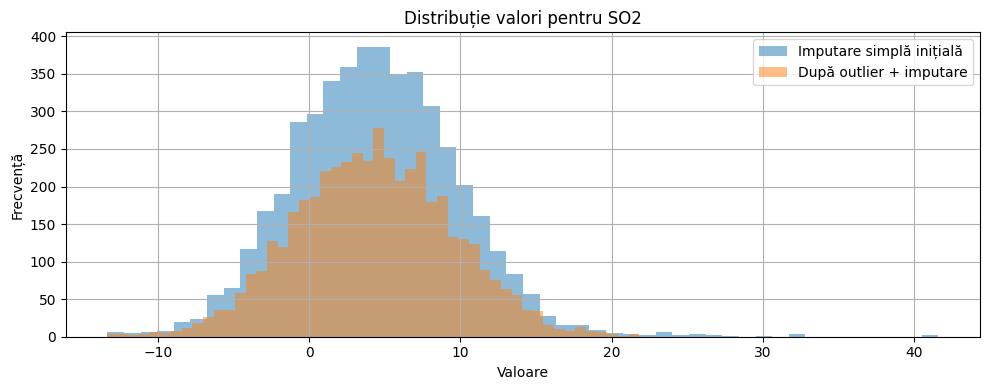

In [50]:
plot_histogram_outliers_after_imputation(df_test_simple_imputed, df_outliers_simple_test, numeric_continuous)


Observatii pe distributia PM25_Value:

Distributia albastra este mai lunga spre dreapta, ceea ce indica prezenta valorilor extreme, care trag media si deviatia standard in sus, pe cand cea portocalie este mai compacta, cu un varf clar. Spike-ul in jurul unei singure valori este datorat faptului ca outlierii au fost inlocuiti cu valoarea mediana. De asemenea, in cazul distributiei portocalii frecventele sunt mai grupate, ceea ce inseamna ca modelul va avea mai putine dificultati in a invata.

3. Atribute redundante

Pentru a putea identifica atributele corelate intre ele, trebuie sa analizam matricea de corelatie Pearson realizata la 3.1: 3. Doua atribute sunt puternic corelate între ele daca au valori ale indicelui de corelație apropiate de -1 sau 1. In cazul nostru, observam urmatorii indici de corelatie apropiati de 1:
- intre AQI_Value si PM25_Value: 0.984160
- intre VOCs si AQI_Value: 0.997472
- intre VOCs si PM25_Value: 0.981831

Prin urmare, putem elimina atributele VOCs si PM25_Value, deoarece acestea sunt redundante.

In [51]:
# Eliminăm coloanele redundante din setul final
df_test_without_redundant_attributes = df_outliers_simple_test.drop(columns=["PM25_Value", "VOCs"])

df_test_without_redundant_attributes.columns


Index(['Country', 'City', 'AQI_Value', 'CO_Value', 'CO_Category',
       'Ozone_Value', 'Ozone_Category', 'NO2_Value', 'NO2_Category',
       'PM25_Category', 'SO2', 'Emissions', 'AQI_Category'],
      dtype='object')

In [52]:
# Eliminăm coloanele redundante din setul final
df_train_without_redundant_attributes = df_outliers_simple_train.drop(columns=["PM25_Value", "VOCs"])

df_train_without_redundant_attributes.columns


Index(['Country', 'City', 'AQI_Value', 'CO_Value', 'CO_Category',
       'Ozone_Value', 'Ozone_Category', 'NO2_Value', 'NO2_Category',
       'PM25_Category', 'SO2', 'Emissions', 'AQI_Category'],
      dtype='object')

4. Standardizare

In [53]:
from sklearn.preprocessing import StandardScaler

numeric_remaining = ["AQI_Value", "CO_Value", "Ozone_Value", "NO2_Value", "SO2"]

scaler = StandardScaler()
df_train_final = df_train_without_redundant_attributes.copy()
df_train_final[numeric_remaining] = scaler.fit_transform(df_train_final[numeric_remaining])
df_test_final = df_test_without_redundant_attributes.copy()
df_test_final[numeric_remaining] = scaler.fit_transform(df_test_final[numeric_remaining])


In [54]:
check_scaling_train = df_train_final[numeric_remaining].agg(["mean", "std"]).T
check_scaling_train.columns = ["Media (aprox. 0)", "Deviația standard (aprox. 1)"]

check_scaling_train


,Media (aprox. 0),Deviația standard (aprox. 1)
AQI_Value,-1.097802e-16,1.000027
CO_Value,-1.025877e-16,1.000027
Ozone_Value,-1.287078e-17,1.000027
NO2_Value,1.059947e-17,1.000027
SO2,5.186167e-17,1.000027


In [55]:
check_scaling_test = df_test_final[numeric_remaining].agg(["mean", "std"]).T
check_scaling_test.columns = ["Media (aprox. 0)", "Deviația standard (aprox. 1)"]

check_scaling_test

,Media (aprox. 0),Deviația standard (aprox. 1)
AQI_Value,-1.718445e-16,1.000107
CO_Value,-5.601978e-17,1.000107
Ozone_Value,-9.689907e-17,1.000107
NO2_Value,-1.722230e-17,1.000107
SO2,-7.267430e-17,1.000107


3.3 Utilizarea algoritmilor de invatare automata

Conversia variabilelor categoriale sub forma numerica

- etichetam varibila tinta AQI_Category_encoded folosind LabelEncoder: fiecare valoare text este transformat intr-un numar

- pe atributele categorice de intrare facem one-hot encoding, care transorma o coloana cu valori categorice in mai multe coloane binare (0/1), cate una pentru fiecare valoare unica

In [56]:
#drop City
df_train_final = df_train_final.drop(columns=["City"])
df_test_final = df_test_final.drop(columns=["City"])

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train = df_train_final.copy()
test = df_test_final.copy()

le = LabelEncoder()
train["AQI_Category_encoded"] = le.fit_transform(train["AQI_Category"])
test["AQI_Category_encoded"] = le.transform(test["AQI_Category"])

categorical_predictors = ["Country", "CO_Category", "Ozone_Category", "NO2_Category", "PM25_Category", "Emissions"]

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

encoded_train = encoder.fit_transform(train[categorical_predictors])
encoded_test = encoder.transform(test[categorical_predictors])

encoded_cols = encoder.get_feature_names_out(categorical_predictors)
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_cols, index=train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_cols, index=test.index)

train = train.drop(columns=categorical_predictors)
test = test.drop(columns=categorical_predictors)
train = pd.concat([train, encoded_train_df], axis=1)
test = pd.concat([test, encoded_test_df], axis=1)

train, test = train.align(test, join="left", axis=1, fill_value=0)


Facem impartirea in X si Y

In [58]:
X_train = train.drop(columns=["AQI_Category", "AQI_Category_encoded"])
y_train = train["AQI_Category_encoded"]

X_test = test.drop(columns=["AQI_Category", "AQI_Category_encoded"])
y_test = test["AQI_Category_encoded"]

In [59]:
print(y_train)

0        0
1        2
2        0
3        0
4        3
        ..
18765    2
18766    2
18767    2
18768    0
18769    2
Name: AQI_Category_encoded, Length: 18770, dtype: int64


1. Decision Tree

Antrenarea arborelui de decizie

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

tree_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=10,
    min_samples_leaf=3,
    class_weight="balanced",
    random_state=42
)

tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)


Evaluare

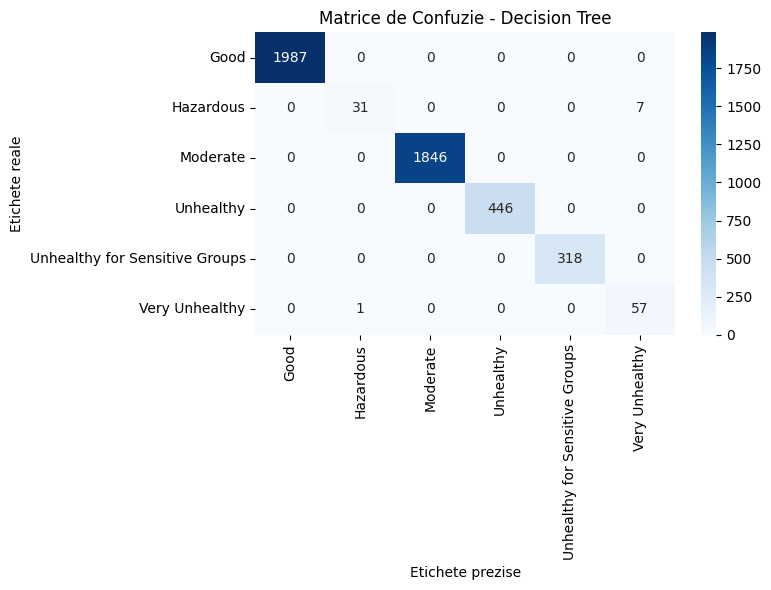

,precision,recall,f1-score
Good,1.0000,1.0000,1.0000
Hazardous,0.9688,0.8158,0.8857
Moderate,1.0000,1.0000,1.0000
Unhealthy,1.0000,1.0000,1.0000
Unhealthy for Sensitive Groups,1.0000,1.0000,1.0000
Very Unhealthy,0.8906,0.9828,0.9344



Acuratețea generală (fără aproximare): 0.9982953334753889


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = le.classes_

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Etichete prezise")
plt.ylabel("Etichete reale")
plt.title("Matrice de Confuzie - Decision Tree")
plt.tight_layout()
plt.show()

report = classification_report(
    y_test, y_pred,
    target_names=class_labels,
    output_dict=True
)

report_df = pd.DataFrame(report).transpose()
selected_metrics = report_df.loc[class_labels, ["precision", "recall", "f1-score"]]

def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

styled_df = selected_metrics.style.format("{:.4f}").apply(highlight_max, subset=["precision", "recall", "f1-score"])
display(styled_df)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcuratețea generală (fără aproximare): {accuracy}")


Paduri Aleatoare

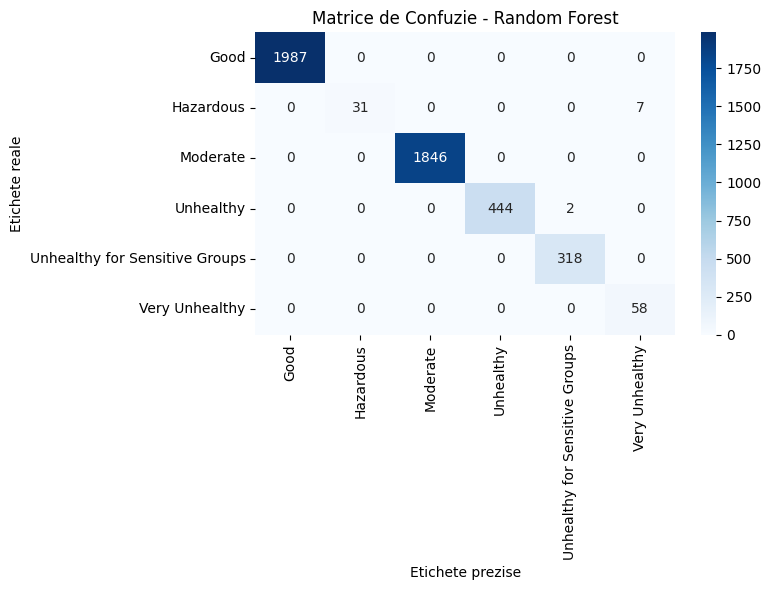


Tabel cu metricele de clasificare per clasă (Random Forest):


,precision,recall,f1-score
Good,1.0000,1.0000,1.0000
Hazardous,1.0000,0.8158,0.8986
Moderate,1.0000,1.0000,1.0000
Unhealthy,1.0000,0.9955,0.9978
Unhealthy for Sensitive Groups,0.9938,1.0000,0.9969
Very Unhealthy,0.8923,1.0000,0.9431
macro avg,0.9810,0.9686,0.9727
weighted avg,0.9982,0.9981,0.9980



Acuratețea generală (fără aproximație): 0.9980822501598124


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=None,
    min_samples_leaf=2,
    class_weight="balanced",
    max_samples=None,
    max_features="sqrt", 
    random_state=42,
    n_jobs=None
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

class_labels = le.classes_

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Etichete prezise")
plt.ylabel("Etichete reale")
plt.title("Matrice de Confuzie - Random Forest")
plt.tight_layout()
plt.show()

report_dict = classification_report(
    y_test, y_pred, target_names=class_labels, output_dict=True, zero_division=0
)
report_df = pd.DataFrame(report_dict).transpose()

metrics_to_display = report_df.loc[
    [label for label in class_labels] + ["macro avg", "weighted avg"],
    ["precision", "recall", "f1-score"]
]

def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

print("\nTabel cu metricele de clasificare per clasă (Random Forest):")
styled_table = metrics_to_display.style.format("{:.4f}").apply(highlight_max, subset=["precision", "recall", "f1-score"])
display(styled_table)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcuratețea generală (fără aproximație): {accuracy}")


Regresie logistica

In [63]:
# add bias coloumn
X_train["bias"] = 1
X_test["bias"] = 1

In [64]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [65]:
def nll_softmax(Y_train, Y_pred):
    N = Y_pred.shape[0]
    epsilon = 1e-15
    return -1 / N * np.sum(Y_train * np.log(Y_pred + epsilon))


In [66]:
def predict_logistic(X, W):
    Z = np.dot(X, W)
    Y = softmax(Z)
    return Y


In [67]:
def accuracy_softmax(Y_predict, Y_test):
    Y_pred = np.argmax(Y_predict, axis=1)  # clasa prezisa
    T_true = np.argmax(Y_test, axis=1)  # clasa reală
    return np.mean(Y_pred == T_true)


In [68]:
def train_and_eval_logistic(X_train, Y_train, X_test, Y_test, lr=0.05, epochs_no=20):
    """
    X_train: (N, D)
    T_train: (N, K) - etichete one-hot
    X_test:  (M, D)
    T_test:  (M, K)
    """
    N, D = X_train.shape
    K = Y_train.shape[1]  # numarul de clase

    W = np.zeros((D, K))

    train_acc, test_acc = [], []
    train_nll, test_nll = [], []

    for epoch in range(epochs_no):
        Y_train_pred = softmax(np.dot(X_train, W))
        Y_test_pred = softmax(np.dot(X_test, W))

        train_acc.append(accuracy_softmax(Y_train_pred, Y_train))
        test_acc.append(accuracy_softmax(Y_test_pred, Y_test))
        train_nll.append(nll_softmax(Y_train, Y_train_pred))
        test_nll.append(nll_softmax(Y_test, Y_test_pred))

        grad = (1 / N) * np.dot(X_train.T, (Y_train_pred - Y_train))
        W -= lr * grad

    return W, train_nll, test_nll, train_acc, test_acc


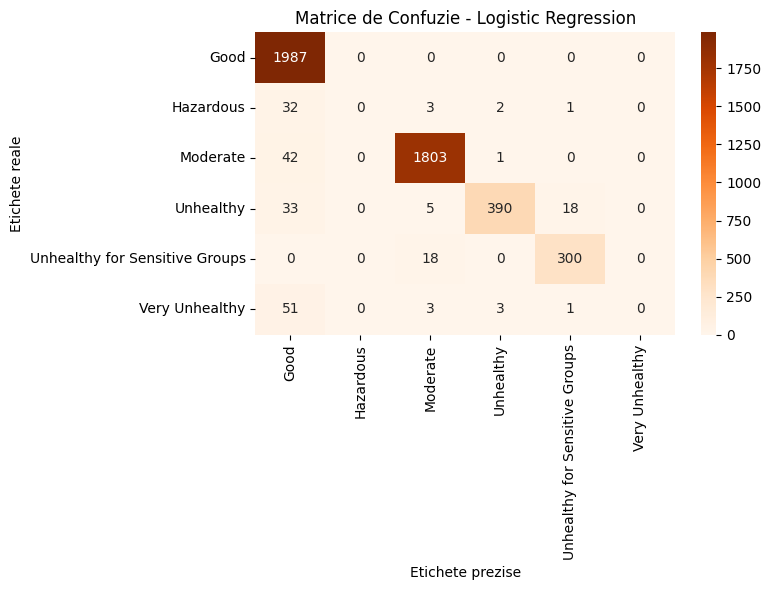


Tabel cu metricele de clasificare per clasă (Logistic Regression):


,precision,recall,f1-score
Good,0.9263,1.0000,0.9618
Hazardous,0.0000,0.0000,0.0000
Moderate,0.9842,0.9767,0.9804
Unhealthy,0.9848,0.8744,0.9264
Unhealthy for Sensitive Groups,0.9375,0.9434,0.9404
Very Unhealthy,0.0000,0.0000,0.0000
macro avg,0.6388,0.6324,0.6348
weighted avg,0.9365,0.9546,0.9446



Acuratețea generală (fără aproximație): 0.9546132537822288


In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

encoder = OneHotEncoder(sparse_output=False)
Y_train = encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
Y_test = encoder.transform(y_test.to_numpy().reshape(-1, 1))

W, train_nll, test_nll, train_acc, test_acc = train_and_eval_logistic(
    X_train, Y_train,
    X_test, Y_test,
    lr=0.15,
    epochs_no=200
)

Y_pred_proba = predict_logistic(X_test, W)
y_pred = np.argmax(Y_pred_proba, axis=1)
y_true = np.argmax(Y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
class_labels = le.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Oranges",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Etichete prezise")
plt.ylabel("Etichete reale")
plt.title("Matrice de Confuzie - Logistic Regression")
plt.tight_layout()
plt.show()

report_dict = classification_report(
    y_true, y_pred,
    target_names=class_labels,
    output_dict=True,
    zero_division=0
)
report_df = pd.DataFrame(report_dict).transpose()

metrics_to_display = report_df.loc[
    [label for label in class_labels] + ["macro avg", "weighted avg"],
    ["precision", "recall", "f1-score"]
]

def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

print("\nTabel cu metricele de clasificare per clasă (Logistic Regression):")
styled_table = metrics_to_display.style.format("{:.4f}").apply(
    highlight_max, subset=["precision", "recall", "f1-score"]
)
display(styled_table)

accuracy = accuracy_score(y_true, y_pred)
print(f"\nAcuratețea generală (fără aproximație): {accuracy}")


In [70]:
import matplotlib.pyplot as plt

def plot_nll(train_nll, test_nll):
    epochs = range(1, len(train_nll) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_nll, label="Train NLL", color="blue", marker="o")
    plt.plot(epochs, test_nll, label="Test NLL", color="orange", marker="x")
    plt.title("Evoluția funcției de cost (Negative Log-Likelihood)")
    plt.xlabel("Epoch")
    plt.ylabel("NLL")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [71]:
print(train_nll)

[np.float64(1.7917594692280487), np.float64(1.6902675444793933), np.float64(1.5957894074241872), np.float64(1.5081564321709067), np.float64(1.4271330456427818), np.float64(1.3524225121008386), np.float64(1.2836776686310176), np.float64(1.2205148954361307), np.float64(1.1625292588219411), np.float64(1.1093089539972463), np.float64(1.060447710065724), np.float64(1.0155544610563687), np.float64(0.974260147453356), np.float64(0.9362219003003408), np.float64(0.9011250652846564), np.float64(0.8686835852566038), np.float64(0.8386392284628732), np.float64(0.8107600723529399), np.float64(0.7848385614926779), np.float64(0.7606893717477031), np.float64(0.7381472401977692), np.float64(0.7170648635459971), np.float64(0.6973109260250532), np.float64(0.6787682884811479), np.float64(0.6613323506422799), np.float64(0.6449095860096709), np.float64(0.6294162412707968), np.float64(0.6147771880225467), np.float64(0.6009249127432613), np.float64(0.5877986305340507), np.float64(0.5753435085932479), np.float6

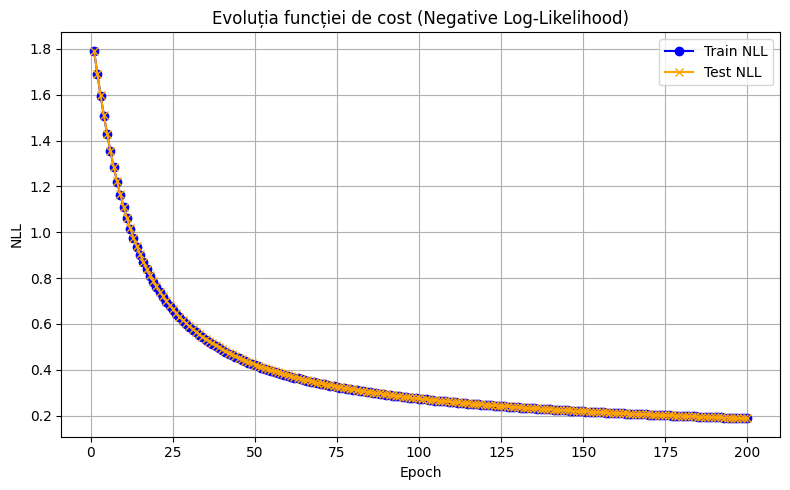

In [72]:

plot_nll(train_nll, test_nll)


MLP

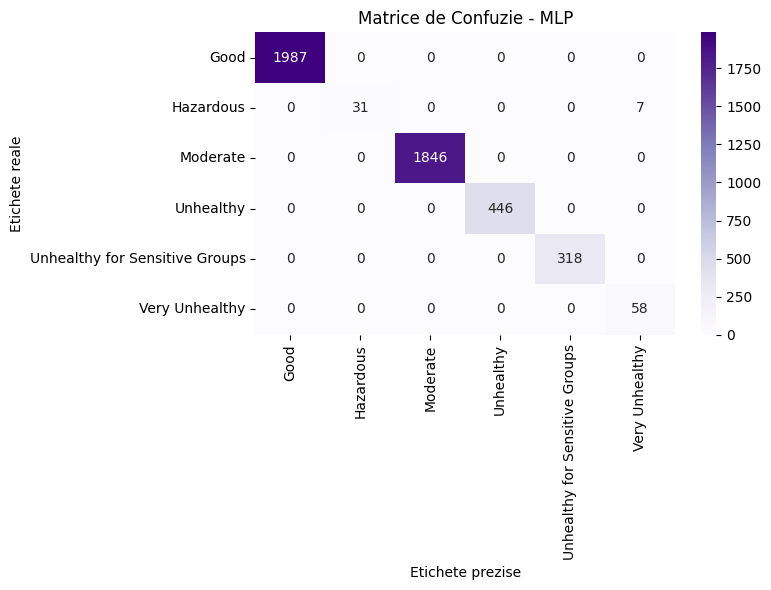


Tabel cu metricele de clasificare per clasă (MLP):


,precision,recall,f1-score
Good,1.0000,1.0000,1.0000
Hazardous,1.0000,0.8158,0.8986
Moderate,1.0000,1.0000,1.0000
Unhealthy,1.0000,1.0000,1.0000
Unhealthy for Sensitive Groups,1.0000,1.0000,1.0000
Very Unhealthy,0.8923,1.0000,0.9431
macro avg,0.9821,0.9693,0.9736
weighted avg,0.9987,0.9985,0.9985



Acuratețea generală (fără aproximație): 0.9985084167909652


In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=200,
    batch_size='auto',
    early_stopping=True,
    alpha=0.0001,
    random_state=42
)

mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)

class_labels = le.classes_

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Purples",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Etichete prezise")
plt.ylabel("Etichete reale")
plt.title("Matrice de Confuzie - MLP")
plt.tight_layout()
plt.show()

report_dict = classification_report(
    y_test, y_pred, target_names=class_labels, output_dict=True, zero_division=0
)
report_df = pd.DataFrame(report_dict).transpose()

metrics_to_display = report_df.loc[
    [label for label in class_labels] + ["macro avg", "weighted avg"],
    ["precision", "recall", "f1-score"]
]

def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

print("\nTabel cu metricele de clasificare per clasă (MLP):")
styled_table = metrics_to_display.style.format("{:.4f}").apply(
    highlight_max, subset=["precision", "recall", "f1-score"]
)
display(styled_table)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcuratețea generală (fără aproximație): {accuracy}")


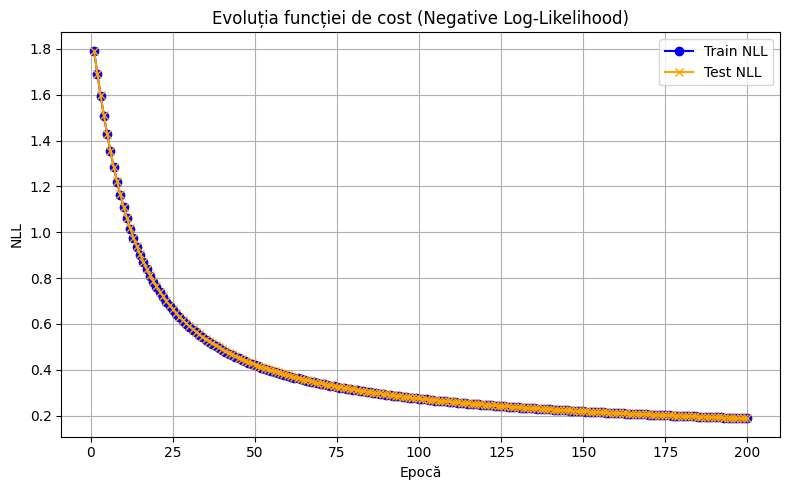

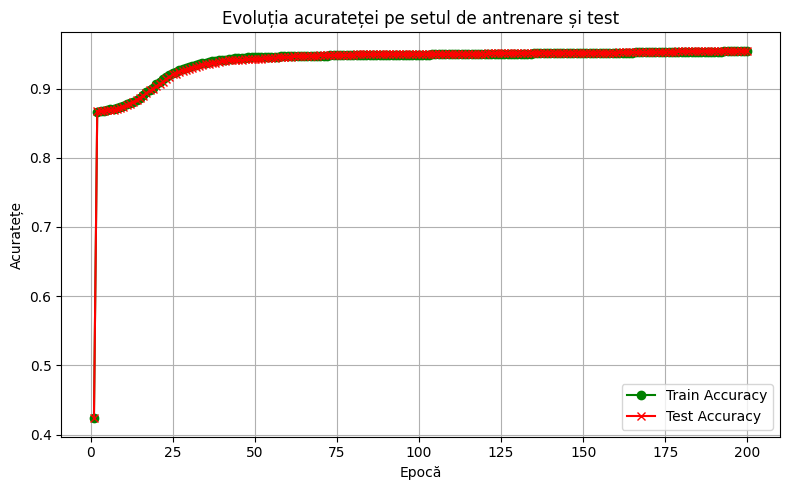

In [74]:
import matplotlib.pyplot as plt

def plot_nll(train_nll, test_nll):
    epochs = range(1, len(train_nll) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_nll, label="Train NLL", color="blue", marker="o")
    plt.plot(epochs, test_nll, label="Test NLL", color="orange", marker="x")
    plt.title("Evoluția funcției de cost (Negative Log-Likelihood)")
    plt.xlabel("Epocă")
    plt.ylabel("NLL")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_accuracy(train_acc, test_acc):
    epochs = range(1, len(train_acc) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_acc, label="Train Accuracy", color="green", marker="o")
    plt.plot(epochs, test_acc, label="Test Accuracy", color="red", marker="x")
    plt.title("Evoluția acurateței pe setul de antrenare și test")
    plt.xlabel("Epocă")
    plt.ylabel("Acuratețe")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_nll(train_nll, test_nll)
plot_accuracy(train_acc, test_acc)


In [78]:
import pandas as pd

metrics = {
    "Decision Tree": {
        "accuracy": 0.9983,
        "Good": [1.0000, 1.0000, 1.0000],
        "Hazardous": [0.9688, 0.8158, 0.8857],
        "Moderate": [1.0000, 1.0000, 1.0000],
        "Unhealthy": [1.0000, 1.0000, 1.0000],
        "Unhealthy for Sensitive Groups": [1.0000, 1.0000, 1.0000],
        "Very Unhealthy": [0.8906, 0.9828, 0.9344]
    },
    "Random Forest": {
        "accuracy": 0.9981,
        "Good": [1.0000, 1.0000, 1.0000],
        "Hazardous": [1.0000, 0.8158, 0.8986],
        "Moderate": [1.0000, 1.0000, 1.0000],
        "Unhealthy": [1.0000, 0.9955, 0.9978],
        "Unhealthy for Sensitive Groups": [0.9938, 1.0000, 0.9969],
        "Very Unhealthy": [0.8923, 1.0000, 0.9431]
    },
    "Logistic Regression": {
        "accuracy": 0.9546,
        "Good": [0.9263, 1.0000, 0.9618],
        "Hazardous": [0.0000, 0.0000, 0.0000],
        "Moderate": [0.9842, 0.9767, 0.9804],
        "Unhealthy": [0.9848, 0.8744, 0.9264],
        "Unhealthy for Sensitive Groups": [0.9375, 0.9434, 0.9404],
        "Very Unhealthy": [0.0000, 0.0000, 0.0000]
    },
    "MLP": {
        "accuracy": 0.9985,
        "Good": [1.0000, 1.0000, 1.0000],
        "Hazardous": [1.0000, 0.8158, 0.8986],
        "Moderate": [1.0000, 1.0000, 1.0000],
        "Unhealthy": [1.0000, 1.0000, 1.0000],
        "Unhealthy for Sensitive Groups": [1.0000, 1.0000, 1.0000],
        "Very Unhealthy": [0.8923, 1.0000, 0.9431]
    }
}

rows = []
for model, values in metrics.items():
    row = {"Model": model, "Accuracy": values["accuracy"]}
    for label in ["Good", "Hazardous", "Moderate", "Unhealthy", "Unhealthy for Sensitive Groups", "Very Unhealthy"]:
        row[f"{label}_Precision"] = values[label][0]
        row[f"{label}_Recall"] = values[label][1]
        row[f"{label}_F1"] = values[label][2]
    rows.append(row)

df = pd.DataFrame(rows).set_index("Model")

def highlight_max_bold(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

styled = df.style.format("{:.4f}").apply(highlight_max_bold, axis=0)
styled


,Accuracy,Good_Precision,Good_Recall,Good_F1,Hazardous_Precision,Hazardous_Recall,Hazardous_F1,Moderate_Precision,Moderate_Recall,Moderate_F1,Unhealthy_Precision,Unhealthy_Recall,Unhealthy_F1,Unhealthy for Sensitive Groups_Precision,Unhealthy for Sensitive Groups_Recall,Unhealthy for Sensitive Groups_F1,Very Unhealthy_Precision,Very Unhealthy_Recall,Very Unhealthy_F1
Model,,,,,,,,,,,,,,,,,,,
Decision Tree,0.9983,1.0000,1.0000,1.0000,0.9688,0.8158,0.8857,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8906,0.9828,0.9344
Random Forest,0.9981,1.0000,1.0000,1.0000,1.0000,0.8158,0.8986,1.0000,1.0000,1.0000,1.0000,0.9955,0.9978,0.9938,1.0000,0.9969,0.8923,1.0000,0.9431
Logistic Regression,0.9546,0.9263,1.0000,0.9618,0.0000,0.0000,0.0000,0.9842,0.9767,0.9804,0.9848,0.8744,0.9264,0.9375,0.9434,0.9404,0.0000,0.0000,0.0000
MLP,0.9985,1.0000,1.0000,1.0000,1.0000,0.8158,0.8986,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8923,1.0000,0.9431
